In [1]:
import os 
import pandas as pd


# Metodos para el analisis de datos según corpus y representación de Doc

In [2]:
def MejoresResultadosClasificadorV1(cls):
    TFIDF_LEXICON = []
    TFIDF = []
    WEMB_LEXICON_TFIDF = []
    WEMB_LEXICON = []
    WEMB = []
    MULTIPLE_TFIDF = []
    MULTIPLE_WEMB = []
    LEXICON = []
    
    resultados = os.listdir(f"{cls}/")

    for i in resultados:
        if "TFIDF_LEXICON" in i:
            TFIDF_LEXICON.append(i)
        elif "MULTIPLE_TFIDF" in i:
            MULTIPLE_TFIDF.append(i)
        elif "MULTIPLE_WEMB" in i:
            MULTIPLE_WEMB.append(i)
        elif "WEMB_LEXICON_TFIDF" in i:
            WEMB_LEXICON_TFIDF.append(i)
        elif "WEMB_LEXICON" in i:
            WEMB_LEXICON.append(i)
        elif "WEMB" in i:
            WEMB.append(i)
        elif "TFIDF" in i:
            TFIDF.append(i)
        elif "LEXICON" in i:
            LEXICON.append(i)
    return  TFIDF, TFIDF_LEXICON, WEMB, WEMB_LEXICON, WEMB_LEXICON_TFIDF, MULTIPLE_TFIDF, MULTIPLE_WEMB, LEXICON


In [3]:
def MejoresResultadosRepresentacionCorpus(cls, representacion):
    list_corpus  = []
    info_res = []
    max_acc = 0 
    doc = ""
    for i in representacion:    
        f = open(f'{cls}/{i}','r')
        datos = list(f)
        acc = datos[0].split(" ")
        acc = float(acc[2]) 
        
        tiempo = datos[4].split(" ")[4]
        tiempo = float(tiempo) 
        
        corpus = i.split("_")
        corpus = corpus[0]
        if corpus not in list_corpus:
            list_corpus.append(corpus)
            data_corpus = {
                "corpus":corpus,
                "max_acc":acc,
                "doc":i,
                "tiempo":tiempo
            }
            info_res.append(data_corpus)
        elif corpus in list_corpus:
            index = list_corpus.index(corpus)
            if acc > info_res[index]["max_acc"]:
                info_res[index]["max_acc"] = acc
                info_res[index]["doc"] = i
        if acc > max_acc:
            max_acc = acc
            doc = i
            
    for j in info_res:
        print("###################################" )
        print(j["corpus"])
        print(round(j["max_acc"], 3))
        print(j["doc"])
        print(round(j["tiempo"],0))
        print("###################################" )
        
    print("Nombre documento: ", doc) 
    print("Mejor Accuracy: ", max_acc) 
    return doc, max_acc

In [4]:
def FiltroCorpus(corpus, resultados):
    rutas_corpus = []
    for i in resultados:
        if corpus in i:
            rutas_corpus.append(i)
    return rutas_corpus

In [5]:
def FiltradoTipoFiltro(resultados):
    rutas_filtro = []
    for i in resultados:
        if "NoFiltrado" in i:
            rutas_filtro.append(i)
        if "Filtrado_spacy" in i:
            rutas_filtro.append(i)
        if "Filtrado_patrones" in i:
            rutas_filtro.append(i)
    return rutas_filtro

In [6]:
def GetResultados(rutas, cls, corpus, representacion):
    resultados = [] 
    for i in rutas:
        f = open(f'{cls}/{i}','r')
        datos = list(f)
        acc = datos[0].split(" ")
        acc = float(acc[2]) 
        
        recall = datos[1].replace(" \n","").split(":")
        recall = float(recall[1])
    
        precc = datos[1].replace(" \n","").split(":")
        precc = float(precc[1])
        
        f1 = datos[1].replace(" \n","").split(":")
        f1 = float(f1[1])

        tiempo = datos[4].split(" ")[4]
        tiempo = float(tiempo) 
        
        corpus = i.split("_")
        corpus = corpus[0]
        
        corpus_filtrado = ""
        filtro = ""
        
        if "NoFiltrado" in i:
            corpus_filtrado = "NoFiltrado"
            filtro = "ninguno"
        
            info_res = {
                "Representación de los documentos":representacion,
                "Algoritmo de Clasificación":cls,
                "Corpus":corpus,
                "Corpus Filtrado":corpus_filtrado,
                "Filtro":filtro,
                "Tiempo de Entrenamiento ":tiempo,
                "Accuracy":acc,
                "Recall":recall,
                "Precision":precc,
                "F1 Score":f1

            }

            resultados.append(info_res)
    
    mejor_res = None
    max_acc = 0
    
    for i in  resultados:
        if max_acc < i["Accuracy"]:
            max_acc = i["Accuracy"]
            mejor_res =  i
    
    return resultados, mejor_res
        

In [7]:
cls = "KNN"
corpus = "HPRD50"

TFIDF, TFIDF_LEXICON, WEMB, WEMB_LEXICON, WEMB_LEXICON_TFIDF, MULTIPLE_TFIDF, MULTIPLE_WEMB, LEXICON = MejoresResultadosClasificadorV1(cls)

rutas_TFIDF = FiltradoTipoFiltro(FiltroCorpus(corpus, LEXICON)) 

resultados_TFIDF = GetResultados(rutas_TFIDF, cls, corpus, "LEXICON")

print(resultados_TFIDF[1])


df = pd.DataFrame(resultados_TFIDF[0])
df.head()

{'Representación de los documentos': 'LEXICON', 'Algoritmo de Clasificación': 'KNN', 'Corpus': 'HPRD50', 'Corpus Filtrado': 'NoFiltrado', 'Filtro': 'ninguno', 'Tiempo de Entrenamiento ': 9.940445184707642, 'Accuracy': 0.6503496503496503, 'Recall': 0.6503496503496503, 'Precision': 0.6503496503496503, 'F1 Score': 0.6503496503496503}


Representación de los documentos Algoritmo de Clasificación  Corpus  \
0                          LEXICON                        KNN  HPRD50   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy   Recall  \
0      NoFiltrado  ninguno                  9.940445   0.65035  0.65035   

   Precision  F1 Score  
0    0.65035   0.65035

In [8]:
def MostrarResultados():
    list_cls = ["NB","SVM","RF","KNN"]
    list_corpus = ["AImed","Biocreative3","CorpusCompleto","HPRD50","IEPA","LLL"]
    
    for cls in list_cls:
        for corpus in list_corpus:
            TFIDF, TFIDF_LEXICON, WEMB, WEMB_LEXICON, WEMB_LEXICON_TFIDF, MULTIPLE_TFIDF, MULTIPLE_WEMB, LEXICON = MejoresResultadosClasificadorV1(cls)
            #TFIDF
            rutas = FiltradoTipoFiltro(FiltroCorpus(corpus, LEXICON))
            resultados = GetResultados(rutas, cls, corpus, "LEXICON")
            
            df = pd.DataFrame(resultados[0])
            display(df)
            
            
MostrarResultados()  

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                         NB  AImed   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                102.976103  0.836968  0.836968   

   Precision  F1 Score  
0   0.836968  0.836968

Representación de los documentos Algoritmo de Clasificación        Corpus  \
0                          LEXICON                         NB  Biocreative3   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                312.491397  0.718765  0.718765   

   Precision  F1 Score  
0   0.718765  0.718765

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                          LEXICON                         NB  CorpusCompleto   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy  Recall  \
0      NoFiltrado  ninguno                 35.047061    0.7287  0.7287   

   Precision  F1 Score  
0     0.7287    0.7287

Representación de los documentos Algoritmo de Clasificación  Corpus  \
0                          LEXICON                         NB  HPRD50   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                  8.063895  0.615385  0.615385   

   Precision  F1 Score  
0   0.615385  0.615385

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                         NB   IEPA   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                  18.10784  0.514815  0.514815   

   Precision  F1 Score  
0   0.514815  0.514815

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                         NB    LLL   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy   Recall  \
0      NoFiltrado  ninguno                 10.569116   0.53211  0.53211   

   Precision  F1 Score  
0    0.53211   0.53211

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                        SVM  AImed   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                121.393281  0.836968  0.836968   

   Precision  F1 Score  
0   0.836968  0.836968

Representación de los documentos Algoritmo de Clasificación        Corpus  \
0                          LEXICON                        SVM  Biocreative3   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                862.390215  0.716836  0.716836   

   Precision  F1 Score  
0   0.716836  0.716836

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                          LEXICON                        SVM  CorpusCompleto   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy  Recall  \
0      NoFiltrado  ninguno                 34.567796    0.7287  0.7287   

   Precision  F1 Score  
0     0.7287    0.7287

Representación de los documentos Algoritmo de Clasificación  Corpus  \
0                          LEXICON                        SVM  HPRD50   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                 11.192716  0.608392  0.608392   

   Precision  F1 Score  
0   0.608392  0.608392

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                        SVM   IEPA   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                 18.708828  0.588889  0.588889   

   Precision  F1 Score  
0   0.588889  0.588889

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                        SVM    LLL   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                     7.239  0.577982  0.577982   

   Precision  F1 Score  
0   0.577982  0.577982

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                         RF  AImed   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                102.494202  0.833853  0.833853   

   Precision  F1 Score  
0   0.833853  0.833853

Representación de los documentos Algoritmo de Clasificación        Corpus  \
0                          LEXICON                         RF  Biocreative3   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                  297.3692  0.663772  0.663772   

   Precision  F1 Score  
0   0.663772  0.663772

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                          LEXICON                         RF  CorpusCompleto   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                 35.248261  0.688341  0.688341   

   Precision  F1 Score  
0   0.688341  0.688341

Representación de los documentos Algoritmo de Clasificación  Corpus  \
0                          LEXICON                         RF  HPRD50   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                  8.878459  0.615385  0.615385   

   Precision  F1 Score  
0   0.615385  0.615385

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                         RF   IEPA   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                 17.226094  0.588889  0.588889   

   Precision  F1 Score  
0   0.588889  0.588889

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                         RF    LLL   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                  7.143396  0.568807  0.568807   

   Precision  F1 Score  
0   0.568807  0.568807

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                        KNN  AImed   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                100.689321  0.833333  0.833333   

   Precision  F1 Score  
0   0.833333  0.833333

Representación de los documentos Algoritmo de Clasificación        Corpus  \
0                          LEXICON                        KNN  Biocreative3   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                300.577033  0.680656  0.680656   

   Precision  F1 Score  
0   0.680656  0.680656

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                          LEXICON                        KNN  CorpusCompleto   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                 33.470403  0.681614  0.681614   

   Precision  F1 Score  
0   0.681614  0.681614

Representación de los documentos Algoritmo de Clasificación  Corpus  \
0                          LEXICON                        KNN  HPRD50   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy   Recall  \
0      NoFiltrado  ninguno                  9.940445   0.65035  0.65035   

   Precision  F1 Score  
0    0.65035   0.65035

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                        KNN   IEPA   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                  15.73131  0.544444  0.544444   

   Precision  F1 Score  
0   0.544444  0.544444

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                          LEXICON                        KNN    LLL   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                  9.981076  0.633028  0.633028   

   Precision  F1 Score  
0   0.633028  0.633028

In [9]:
def MejoresResultados():
    list_cls = ["NB","SVM","RF","KNN"]
    list_corpus = ["AImed","Biocreative3","CorpusCompleto","HPRD50","IEPA","LLL"]
    mejores_res_TFIDF, mejores_res_TFIDF_LEXICON, mejores_res_WEMB, mejores_res_WEMB_LEXICON,mejores_res_WEMB_LEXICON_TFIDF, mejores_res_MULTIPLE_TFIDF, mejores_res_MULTIPLE_WEMB, mejores_res_LEXICON =  [], [], [], [], [], [], [], []
    
    for cls in list_cls:
        for corpus in list_corpus:
            TFIDF, TFIDF_LEXICON, WEMB, WEMB_LEXICON, WEMB_LEXICON_TFIDF, MULTIPLE_TFIDF, MULTIPLE_WEMB, LEXICON = MejoresResultadosClasificadorV1(cls)
            #TFIDF
            rutas_TFIDF = FiltradoTipoFiltro(FiltroCorpus(corpus, TFIDF))
            resultados_TFIDF = GetResultados(rutas_TFIDF, cls, corpus, "TFIDF")
            mejores_res_TFIDF.append(resultados_TFIDF[1])
            
            #TFIDF_LEXICON
            rutas_TFIDF_LEXICON = FiltradoTipoFiltro(FiltroCorpus(corpus, TFIDF_LEXICON))
            resultados_TFIDF_LEXICON = GetResultados(rutas_TFIDF_LEXICON, cls, corpus, "TFIDF_LEXICON")
            mejores_res_TFIDF_LEXICON.append(resultados_TFIDF_LEXICON[1])
            
            #WEMB
            rutas_WEMB = FiltradoTipoFiltro(FiltroCorpus(corpus, WEMB))
            resultados_WEMB = GetResultados(rutas_WEMB, cls, corpus, "WEMB")
            mejores_res_WEMB.append(resultados_WEMB[1])
            
            #WEMB_LEXICON
            
            rutas_WEMB_LEXICON = FiltradoTipoFiltro(FiltroCorpus(corpus, WEMB_LEXICON))
            resultados_WEMB_LEXICON = GetResultados(rutas_WEMB_LEXICON, cls, corpus, "WEMB_LEXICON")
            mejores_res_WEMB_LEXICON.append(resultados_WEMB_LEXICON[1])
            
            #WEMB_LEXICON_TFIDF 
            
            rutas_WEMB_LEXICON_TFIDF = FiltradoTipoFiltro(FiltroCorpus(corpus, WEMB_LEXICON_TFIDF))
            resultados_WEMB_LEXICON_TFIDF = GetResultados(rutas_WEMB_LEXICON_TFIDF, cls, corpus, "WEMB_LEXICON_TFIDF")
            mejores_res_WEMB_LEXICON_TFIDF.append(resultados_WEMB_LEXICON_TFIDF[1])
            
            #MULTIPLE_TFIDF 
            
            rutas_MULTIPLE_TFIDF = FiltradoTipoFiltro(FiltroCorpus(corpus, MULTIPLE_TFIDF))
            resultados_MULTIPLE_TFIDF = GetResultados(rutas_MULTIPLE_TFIDF, cls, corpus, "MULTIPLE_TFIDF")
            mejores_res_MULTIPLE_TFIDF.append(resultados_MULTIPLE_TFIDF[1])
            
            #MULTIPLE_WEMB 
            
            rutas_MULTIPLE_WEMB = FiltradoTipoFiltro(FiltroCorpus(corpus, MULTIPLE_WEMB))
            resultados_MULTIPLE_WEMB = GetResultados(rutas_MULTIPLE_WEMB, cls, corpus, "MULTIPLE_WEMB")
            mejores_res_MULTIPLE_WEMB.append(resultados_MULTIPLE_WEMB[1])
            
            #LEXICON
            
            rutas_LEXICON = FiltradoTipoFiltro(FiltroCorpus(corpus, LEXICON))
            resultados_LEXICON = GetResultados(rutas_LEXICON, cls, corpus, "LEXICON")
            mejores_res_LEXICON.append(resultados_LEXICON[1])
            
            #print("cls: ",cls, " corpus: ", corpus)
            #print(resultados_LEXICON[1])
            
            #df = pd.DataFrame(resultados_LEXICON[0])
            #display(df)
            
            
            
            
    df_TFIDF = pd.DataFrame(mejores_res_TFIDF)
    df_TFIDF_LEXICON = pd.DataFrame(mejores_res_TFIDF_LEXICON)
    df_WEMB = pd.DataFrame(mejores_res_WEMB)
    df_WEMB_LEXICON = pd.DataFrame(mejores_res_WEMB_LEXICON)
    df_WEMB_LEXICON_TFIDF = pd.DataFrame(mejores_res_WEMB_LEXICON_TFIDF)
    df_MULTIPLE_TFIDF = pd.DataFrame(mejores_res_MULTIPLE_TFIDF)
    df_MULTIPLE_WEMB = pd.DataFrame(mejores_res_MULTIPLE_WEMB)
    df_LEXICON = pd.DataFrame(mejores_res_LEXICON)
    return df_TFIDF, df_TFIDF_LEXICON, df_WEMB, df_WEMB_LEXICON, df_WEMB_LEXICON_TFIDF, df_MULTIPLE_TFIDF, df_MULTIPLE_WEMB, df_LEXICON

MejoresResultados()

(   Representación de los documentos Algoritmo de Clasificación  \
 0                             TFIDF                         NB   
 1                             TFIDF                         NB   
 2                             TFIDF                         NB   
 3                             TFIDF                         NB   
 4                             TFIDF                         NB   
 5                             TFIDF                         NB   
 6                             TFIDF                        SVM   
 7                             TFIDF                        SVM   
 8                             TFIDF                        SVM   
 9                             TFIDF                        SVM   
 10                            TFIDF                        SVM   
 11                            TFIDF                        SVM   
 12                            TFIDF                         RF   
 13                            TFIDF                         R

In [13]:
df_TFIDF, df_TFIDF_LEXICON, df_WEMB, df_WEMB_LEXICON, df_WEMB_LEXICON_TFIDF, df_MULTIPLE_TFIDF, df_MULTIPLE_WEMB, df_LEXICON =   MejoresResultados()        
print("TFIDF")
display(df_TFIDF)
print("TFIDF_LEXICON")
display(df_TFIDF_LEXICON)
print("WEMB")
display(df_WEMB)
print("WEMB_LEXICON")
display(df_WEMB_LEXICON)
print("WEMB_LEXICON_TFIDF")
display(df_WEMB_LEXICON_TFIDF)
print("MULTIPLE_TFIDF")
display(df_MULTIPLE_TFIDF)
print("MULTIPLE_WEMB")
display(df_MULTIPLE_WEMB)
print("LEXICON")
display(df_LEXICON)

TFIDF


Representación de los documentos Algoritmo de Clasificación  \
0                             TFIDF                         NB   
1                             TFIDF                         NB   
2                             TFIDF                         NB   
3                             TFIDF                         NB   
4                             TFIDF                         NB   
5                             TFIDF                         NB   
6                             TFIDF                        SVM   
7                             TFIDF                        SVM   
8                             TFIDF                        SVM   
9                             TFIDF                        SVM   
10                            TFIDF                        SVM   
11                            TFIDF                        SVM   
12                            TFIDF                         RF   
13                            TFIDF                         RF   
14                            TFIDF                         RF   
15                            TFIDF                         RF   
16                            TFIDF                         RF   
17                            TFIDF                         RF   
18                            TFIDF                        KNN   
19                            TFIDF                        KNN   
20                            TFIDF                        KNN   
21                            TFIDF                        KNN   
22                            TFIDF                        KNN   
23                            TFIDF                        KNN   

            Corpus Corpus Filtrado   Filtro  Tiempo de Entrenamiento   \
0            AImed      NoFiltrado  ninguno                 92.488151   
1     Biocreative3      NoFiltrado  ninguno                302.055523   
2   CorpusCompleto      NoFiltrado  ninguno                 33.112509   
3           HPRD50      NoFiltrado  ninguno                  5.629009   
4             IEPA      NoFiltrado  ninguno                 13.548021   
5              LLL      NoFiltrado  ninguno                  5.094599   
6            AImed      NoFiltrado  ninguno                100.631377   
7     Biocreative3      NoFiltrado  ninguno                329.381851   
8   CorpusCompleto      NoFiltrado  ninguno                 30.311105   
9           HPRD50      NoFiltrado  ninguno                  6.625437   
10            IEPA      NoFiltrado  ninguno                 12.107881   
11             LLL      NoFiltrado  ninguno                  4.974388   
12           AImed      NoFiltrado  ninguno                107.585817   
13    Biocreative3      NoFiltrado  ninguno                301.060879   
14  CorpusCompleto      NoFiltrado  ninguno                 36.065202   
15          HPRD50      NoFiltrado  ninguno                  6.097360   
16            IEPA      NoFiltrado  ninguno                 12.835084   
17             LLL      NoFiltrado  ninguno                  4.831704   
18           AImed      NoFiltrado  ninguno                 98.673084   
19    Biocreative3      NoFiltrado  ninguno                296.570237   
20  CorpusCompleto      NoFiltrado  ninguno                 33.305912   
21          HPRD50      NoFiltrado  ninguno                  6.203209   
22            IEPA      NoFiltrado  ninguno                 12.618277   
23             LLL      NoFiltrado  ninguno                  4.960551   

    Accuracy    Recall  Precision  F1 Score  
0   0.569055  0.569055   0.569055  0.569055  
1   0.768934  0.768934   0.768934  0.768934  
2   0.715247  0.715247   0.715247  0.715247  
3   0.657343  0.657343   0.657343  0.657343  
4   0.566667  0.566667   0.566667  0.566667  
5   0.577982  0.577982   0.577982  0.577982  
6   0.829180  0.829180   0.829180  0.829180  
7   0.856729  0.856729   0.856729  0.856729  
8   0.816143  0.816143   0.816143  0.816143  
9   0.608392  0.608392   0.608392  0.608392  
10  0.644444  0.6444

TFIDF_LEXICON


Representación de los documentos Algoritmo de Clasificación  \
0                     TFIDF_LEXICON                         NB   
1                     TFIDF_LEXICON                         NB   
2                     TFIDF_LEXICON                         NB   
3                     TFIDF_LEXICON                         NB   
4                     TFIDF_LEXICON                         NB   
5                     TFIDF_LEXICON                         NB   
6                     TFIDF_LEXICON                        SVM   
7                     TFIDF_LEXICON                        SVM   
8                     TFIDF_LEXICON                        SVM   
9                     TFIDF_LEXICON                        SVM   
10                    TFIDF_LEXICON                        SVM   
11                    TFIDF_LEXICON                        SVM   
12                    TFIDF_LEXICON                         RF   
13                    TFIDF_LEXICON                         RF   
14                    TFIDF_LEXICON                         RF   
15                    TFIDF_LEXICON                         RF   
16                    TFIDF_LEXICON                         RF   
17                    TFIDF_LEXICON                         RF   
18                    TFIDF_LEXICON                        KNN   
19                    TFIDF_LEXICON                        KNN   
20                    TFIDF_LEXICON                        KNN   
21                    TFIDF_LEXICON                        KNN   
22                    TFIDF_LEXICON                        KNN   
23                    TFIDF_LEXICON                        KNN   

            Corpus Corpus Filtrado   Filtro  Tiempo de Entrenamiento   \
0            AImed      NoFiltrado  ninguno                225.591614   
1     Biocreative3      NoFiltrado  ninguno                851.315650   
2   CorpusCompleto      NoFiltrado  ninguno                 80.958955   
3           HPRD50      NoFiltrado  ninguno                 14.716802   
4             IEPA      NoFiltrado  ninguno                 30.298542   
5              LLL      NoFiltrado  ninguno                 12.917878   
6            AImed      NoFiltrado  ninguno                524.345472   
7     Biocreative3      NoFiltrado  ninguno               9534.949409   
8   CorpusCompleto      NoFiltrado  ninguno                626.965864   
9           HPRD50      NoFiltrado  ninguno                 16.925572   
10            IEPA      NoFiltrado  ninguno                 38.116240   
11             LLL      NoFiltrado  ninguno                 14.463799   
12           AImed      NoFiltrado  ninguno                207.627761   
13    Biocreative3      NoFiltrado  ninguno                758.229517   
14  CorpusCompleto      NoFiltrado  ninguno                 79.174672   
15          HPRD50      NoFiltrado  ninguno                 17.264763   
16            IEPA      NoFiltrado  ninguno                 37.351989   
17             LLL      NoFiltrado  ninguno                 14.200989   
18           AImed      NoFiltrado  ninguno                220.947459   
19    Biocreative3      NoFiltrado  ninguno                733.763691   
20  CorpusCompleto      NoFiltrado  ninguno                 77.646898   
21          HPRD50      NoFiltrado  ninguno                 15.019379   
22            IEPA      NoFiltrado  ninguno                 30.619646   
23             LLL      NoFiltrado  ninguno                 12.751901   

    Accuracy    Recall  Precision  F1 Score  
0   0.672378  0.672378   0.672378  0.672378  
1   0.479498  0.479498   0.479498  0.479498  
2   0.587444  0.587444   0.587444  0.587444  
3   0.671329  0.671329   0.671329  0.671329  
4   0.592593  0.592593   0.592593  0.592593  
5   0.587156  0.587156   0.587156  0.587156  
6   0.833333  0.833333   0.833333  0.833333  
7   0.753015  0.753015   0.753015  0.753015  
8   0.818386  0.818386   0.818386  0.818386  
9   0.594406  0.594406   0.594406  0.594406  
10  0.622222  0.6222

WEMB


Representación de los documentos Algoritmo de Clasificación  \
0                              WEMB                         NB   
1                              WEMB                         NB   
2                              WEMB                         NB   
3                              WEMB                         NB   
4                              WEMB                         NB   
5                              WEMB                         NB   
6                              WEMB                        SVM   
7                              WEMB                        SVM   
8                              WEMB                        SVM   
9                              WEMB                        SVM   
10                             WEMB                        SVM   
11                             WEMB                        SVM   
12                             WEMB                         RF   
13                             WEMB                         RF   
14                             WEMB                         RF   
15                             WEMB                         RF   
16                             WEMB                         RF   
17                             WEMB                         RF   
18                             WEMB                        KNN   
19                             WEMB                        KNN   
20                             WEMB                        KNN   
21                             WEMB                        KNN   
22                             WEMB                        KNN   
23                             WEMB                        KNN   

            Corpus Corpus Filtrado   Filtro  Tiempo de Entrenamiento   \
0            AImed      NoFiltrado  ninguno                109.141356   
1     Biocreative3      NoFiltrado  ninguno                348.508570   
2   CorpusCompleto      NoFiltrado  ninguno                 42.657626   
3           HPRD50      NoFiltrado  ninguno                  7.248187   
4             IEPA      NoFiltrado  ninguno                 16.471139   
5              LLL      NoFiltrado  ninguno                  6.999707   
6            AImed      NoFiltrado  ninguno                104.106399   
7     Biocreative3      NoFiltrado  ninguno                339.143899   
8   CorpusCompleto      NoFiltrado  ninguno                 41.133594   
9           HPRD50      NoFiltrado  ninguno                  8.209388   
10            IEPA      NoFiltrado  ninguno                 15.949243   
11             LLL      NoFiltrado  ninguno                 10.175756   
12           AImed      NoFiltrado  ninguno                114.488460   
13    Biocreative3      NoFiltrado  ninguno                353.760495   
14  CorpusCompleto      NoFiltrado  ninguno                 41.619095   
15          HPRD50      NoFiltrado  ninguno                  8.777675   
16            IEPA      NoFiltrado  ninguno                 17.000109   
17             LLL      NoFiltrado  ninguno                 10.493382   
18           AImed      NoFiltrado  ninguno                104.890403   
19    Biocreative3      NoFiltrado  ninguno                334.772988   
20  CorpusCompleto      NoFiltrado  ninguno                 40.747840   
21          HPRD50      NoFiltrado  ninguno                  8.609251   
22            IEPA      NoFiltrado  ninguno                 16.980393   
23             LLL      NoFiltrado  ninguno                  7.092764   

    Accuracy    Recall  Precision  F1 Score  
0   0.654725  0.654725   0.654725  0.654725  
1   0.787747  0.787747   0.787747  0.787747  
2   0.778027  0.778027   0.778027  0.778027  
3   0.650350  0.650350   0.650350  0.650350  
4   0.544444  0.544444   0.544444  0.544444  
5   0.633028  0.633028   0.633028  0.633028  
6   0.836968  0.836968   0.836968  0.836968  
7   0.857694  0.857694   0.857694  0.857694  
8   0.818386  0.818386   0.818386  0.818386  
9   0.601399  0.601399   0.601399  0.601399  
10  0.588889  0.5888

WEMB_LEXICON


Representación de los documentos Algoritmo de Clasificación  \
0                      WEMB_LEXICON                         NB   
1                      WEMB_LEXICON                         NB   
2                      WEMB_LEXICON                         NB   
3                      WEMB_LEXICON                         NB   
4                      WEMB_LEXICON                         NB   
5                      WEMB_LEXICON                         NB   
6                      WEMB_LEXICON                        SVM   
7                      WEMB_LEXICON                        SVM   
8                      WEMB_LEXICON                        SVM   
9                      WEMB_LEXICON                        SVM   
10                     WEMB_LEXICON                        SVM   
11                     WEMB_LEXICON                        SVM   
12                     WEMB_LEXICON                         RF   
13                     WEMB_LEXICON                         RF   
14                     WEMB_LEXICON                         RF   
15                     WEMB_LEXICON                         RF   
16                     WEMB_LEXICON                         RF   
17                     WEMB_LEXICON                         RF   
18                     WEMB_LEXICON                        KNN   
19                     WEMB_LEXICON                        KNN   
20                     WEMB_LEXICON                        KNN   
21                     WEMB_LEXICON                        KNN   
22                     WEMB_LEXICON                        KNN   
23                     WEMB_LEXICON                        KNN   

            Corpus Corpus Filtrado   Filtro  Tiempo de Entrenamiento   \
0            AImed      NoFiltrado  ninguno                241.656220   
1     Biocreative3      NoFiltrado  ninguno                817.303361   
2   CorpusCompleto      NoFiltrado  ninguno                 79.063002   
3           HPRD50      NoFiltrado  ninguno                 21.345541   
4             IEPA      NoFiltrado  ninguno                 32.078719   
5              LLL      NoFiltrado  ninguno                 13.283342   
6            AImed      NoFiltrado  ninguno               2190.462702   
7     Biocreative3      NoFiltrado  ninguno               2358.848070   
8   CorpusCompleto      NoFiltrado  ninguno                136.012154   
9           HPRD50      NoFiltrado  ninguno                 17.992496   
10            IEPA      NoFiltrado  ninguno                 35.213359   
11             LLL      NoFiltrado  ninguno                 15.106650   
12           AImed      NoFiltrado  ninguno                251.239677   
13    Biocreative3      NoFiltrado  ninguno                817.692515   
14  CorpusCompleto      NoFiltrado  ninguno                 79.701858   
15          HPRD50      NoFiltrado  ninguno                 16.215569   
16            IEPA      NoFiltrado  ninguno                 32.076005   
17             LLL      NoFiltrado  ninguno                 13.680498   
18           AImed      NoFiltrado  ninguno                251.500353   
19    Biocreative3      NoFiltrado  ninguno                845.200881   
20  CorpusCompleto      NoFiltrado  ninguno                 78.774435   
21          HPRD50      NoFiltrado  ninguno                 15.867747   
22            IEPA      NoFiltrado  ninguno                 32.264232   
23             LLL      NoFiltrado  ninguno                 19.191720   

    Accuracy    Recall  Precision  F1 Score  
0   0.656802  0.656802   0.656802  0.656802  
1   0.778582  0.778582   0.778582  0.778582  
2   0.778027  0.778027   0.778027  0.778027  
3   0.657343  0.657343   0.657343  0.657343  
4   0.540741  0.540741   0.540741  0.540741  
5   0.633028  0.633028   0.633028  0.633028  
6   0.836968  0.836968   0.836968  0.836968  
7   0.861071  0.861071   0.861071  0.861071  
8   0.825112  0.825112   0.825112  0.825112  
9   0.608392  0.608392   0.608392  0.608392  
10  0.592593  0.5925

WEMB_LEXICON_TFIDF


Representación de los documentos Algoritmo de Clasificación  \
0                WEMB_LEXICON_TFIDF                         NB   
1                WEMB_LEXICON_TFIDF                         NB   
2                WEMB_LEXICON_TFIDF                         NB   
3                WEMB_LEXICON_TFIDF                         NB   
4                WEMB_LEXICON_TFIDF                         NB   
5                WEMB_LEXICON_TFIDF                         NB   
6                WEMB_LEXICON_TFIDF                        SVM   
7                WEMB_LEXICON_TFIDF                        SVM   
8                WEMB_LEXICON_TFIDF                        SVM   
9                WEMB_LEXICON_TFIDF                        SVM   
10               WEMB_LEXICON_TFIDF                        SVM   
11               WEMB_LEXICON_TFIDF                        SVM   
12               WEMB_LEXICON_TFIDF                         RF   
13               WEMB_LEXICON_TFIDF                         RF   
14               WEMB_LEXICON_TFIDF                         RF   
15               WEMB_LEXICON_TFIDF                         RF   
16               WEMB_LEXICON_TFIDF                         RF   
17               WEMB_LEXICON_TFIDF                         RF   
18               WEMB_LEXICON_TFIDF                        KNN   
19               WEMB_LEXICON_TFIDF                        KNN   
20               WEMB_LEXICON_TFIDF                        KNN   
21               WEMB_LEXICON_TFIDF                        KNN   
22               WEMB_LEXICON_TFIDF                        KNN   
23               WEMB_LEXICON_TFIDF                        KNN   

            Corpus Corpus Filtrado   Filtro  Tiempo de Entrenamiento   \
0            AImed      NoFiltrado  ninguno                364.492272   
1     Biocreative3      NoFiltrado  ninguno               1912.484694   
2   CorpusCompleto      NoFiltrado  ninguno                146.068208   
3           HPRD50      NoFiltrado  ninguno                 24.168347   
4             IEPA      NoFiltrado  ninguno                 62.335814   
5              LLL      NoFiltrado  ninguno                 33.334965   
6            AImed      NoFiltrado  ninguno                627.235574   
7     Biocreative3      NoFiltrado  ninguno              11051.030800   
8   CorpusCompleto      NoFiltrado  ninguno               2448.810711   
9           HPRD50      NoFiltrado  ninguno                 30.938292   
10            IEPA      NoFiltrado  ninguno                 60.003565   
11             LLL      NoFiltrado  ninguno                 20.993325   
12           AImed      NoFiltrado  ninguno                400.091355   
13    Biocreative3      NoFiltrado  ninguno               1455.855197   
14  CorpusCompleto      NoFiltrado  ninguno                157.406723   
15          HPRD50      NoFiltrado  ninguno                 37.092052   
16            IEPA      NoFiltrado  ninguno                 67.344206   
17             LLL      NoFiltrado  ninguno                 21.693269   
18           AImed      NoFiltrado  ninguno                375.032736   
19    Biocreative3      NoFiltrado  ninguno               1845.661695   
20  CorpusCompleto      NoFiltrado  ninguno                172.704251   
21          HPRD50      NoFiltrado  ninguno                 34.508371   
22            IEPA      NoFiltrado  ninguno                 51.537007   
23             LLL      NoFiltrado  ninguno                 25.824179   

    Accuracy    Recall  Precision  F1 Score  
0   0.671859  0.671859   0.671859  0.671859  
1   0.553304  0.553304   0.553304  0.553304  
2   0.598655  0.598655   0.598655  0.598655  
3   0.692308  0.692308   0.692308  0.692308  
4   0.592593  0.592593   0.592593  0.592593  
5   0.587156  0.587156   0.587156  0.587156  
6   0.838525  0.838525   0.838525  0.838525  
7   0.873131  0.873131   0.873131  0.873131  
8   0.825112  0.825112   0.825112  0.825112  
9   0.636364  0.636364   0.636364  0.636364  
10  0.618519  0.6185

MULTIPLE_TFIDF


Representación de los documentos Algoritmo de Clasificación  \
0                    MULTIPLE_TFIDF                         NB   
1                    MULTIPLE_TFIDF                         NB   
2                    MULTIPLE_TFIDF                         NB   
3                    MULTIPLE_TFIDF                         NB   
4                    MULTIPLE_TFIDF                         NB   
5                    MULTIPLE_TFIDF                         NB   
6                    MULTIPLE_TFIDF                        SVM   
7                    MULTIPLE_TFIDF                        SVM   
8                    MULTIPLE_TFIDF                        SVM   
9                    MULTIPLE_TFIDF                        SVM   
10                   MULTIPLE_TFIDF                        SVM   
11                   MULTIPLE_TFIDF                        SVM   
12                   MULTIPLE_TFIDF                         RF   
13                   MULTIPLE_TFIDF                         RF   
14                   MULTIPLE_TFIDF                         RF   
15                   MULTIPLE_TFIDF                         RF   
16                   MULTIPLE_TFIDF                         RF   
17                   MULTIPLE_TFIDF                         RF   
18                   MULTIPLE_TFIDF                        KNN   
19                   MULTIPLE_TFIDF                        KNN   
20                   MULTIPLE_TFIDF                        KNN   
21                   MULTIPLE_TFIDF                        KNN   
22                   MULTIPLE_TFIDF                        KNN   
23                   MULTIPLE_TFIDF                        KNN   

            Corpus Corpus Filtrado   Filtro  Tiempo de Entrenamiento   \
0            AImed      NoFiltrado  ninguno               1225.116347   
1     Biocreative3      NoFiltrado  ninguno               2163.070065   
2   CorpusCompleto      NoFiltrado  ninguno                290.620697   
3           HPRD50      NoFiltrado  ninguno                467.948756   
4             IEPA      NoFiltrado  ninguno                503.127329   
5              LLL      NoFiltrado  ninguno                162.755086   
6            AImed      NoFiltrado  ninguno               1650.117236   
7     Biocreative3      NoFiltrado  ninguno               6169.088181   
8   CorpusCompleto      NoFiltrado  ninguno                854.534274   
9           HPRD50      NoFiltrado  ninguno                479.620132   
10            IEPA      NoFiltrado  ninguno                499.212233   
11             LLL      NoFiltrado  ninguno                439.636564   
12           AImed      NoFiltrado  ninguno               1244.475741   
13    Biocreative3      NoFiltrado  ninguno               2402.201896   
14  CorpusCompleto      NoFiltrado  ninguno                596.558401   
15          HPRD50      NoFiltrado  ninguno                478.199066   
16            IEPA      NoFiltrado  ninguno                501.169264   
17             LLL      NoFiltrado  ninguno                437.266045   
18           AImed      NoFiltrado  ninguno               1244.416628   
19    Biocreative3      NoFiltrado  ninguno               2291.114964   
20  CorpusCompleto      NoFiltrado  ninguno                284.405534   
21          HPRD50      NoFiltrado  ninguno                482.456146   
22            IEPA      NoFiltrado  ninguno                507.628004   
23             LLL      NoFiltrado  ninguno                176.914524   

    Accuracy    Recall  Precision  F1 Score  
0   0.583074  0.583074   0.583074  0.583074  
1   0.773758  0.773758   0.773758  0.773758  
2   0.733184  0.733184   0.733184  0.733184  
3   0.678322  0.678322   0.678322  0.678322  
4   0.566667  0.566667   0.566667  0.566667  
5   0.577982  0.333333   0.333333  0.333333  
6   0.829180  0.829180   0.829180  0.829180  
7   0.850941  0.850941   0.850941  0.850941  
8   0.811659  0.811659   0.811659  0.811659  
9   0.608392  0.608392   0.608392  0.608392  
10  0.640741  0.6407

MULTIPLE_WEMB


Representación de los documentos Algoritmo de Clasificación  \
0                     MULTIPLE_WEMB                         NB   
1                     MULTIPLE_WEMB                         NB   
2                     MULTIPLE_WEMB                         NB   
3                     MULTIPLE_WEMB                         NB   
4                     MULTIPLE_WEMB                         NB   
5                     MULTIPLE_WEMB                         NB   
6                     MULTIPLE_WEMB                        SVM   
7                     MULTIPLE_WEMB                        SVM   
8                     MULTIPLE_WEMB                        SVM   
9                     MULTIPLE_WEMB                        SVM   
10                    MULTIPLE_WEMB                        SVM   
11                    MULTIPLE_WEMB                        SVM   
12                    MULTIPLE_WEMB                         RF   
13                    MULTIPLE_WEMB                         RF   
14                    MULTIPLE_WEMB                         RF   
15                    MULTIPLE_WEMB                         RF   
16                    MULTIPLE_WEMB                         RF   
17                    MULTIPLE_WEMB                         RF   
18                    MULTIPLE_WEMB                        KNN   
19                    MULTIPLE_WEMB                        KNN   
20                    MULTIPLE_WEMB                        KNN   
21                    MULTIPLE_WEMB                        KNN   
22                    MULTIPLE_WEMB                        KNN   
23                    MULTIPLE_WEMB                        KNN   

            Corpus Corpus Filtrado   Filtro  Tiempo de Entrenamiento   \
0            AImed      NoFiltrado  ninguno               1939.075623   
1     Biocreative3      NoFiltrado  ninguno               2230.371305   
2   CorpusCompleto      NoFiltrado  ninguno                859.738506   
3           HPRD50      NoFiltrado  ninguno                504.897446   
4             IEPA      NoFiltrado  ninguno                254.812843   
5              LLL      NoFiltrado  ninguno               1155.875324   
6            AImed      NoFiltrado  ninguno               2481.121675   
7     Biocreative3      NoFiltrado  ninguno               2840.640232   
8   CorpusCompleto      NoFiltrado  ninguno                844.529943   
9           HPRD50      NoFiltrado  ninguno                510.593861   
10            IEPA      NoFiltrado  ninguno               1642.760031   
11             LLL      NoFiltrado  ninguno                208.158041   
12           AImed      NoFiltrado  ninguno               2319.828656   
13    Biocreative3      NoFiltrado  ninguno               1611.521348   
14  CorpusCompleto      NoFiltrado  ninguno                735.243039   
15          HPRD50      NoFiltrado  ninguno                513.594100   
16            IEPA      NoFiltrado  ninguno                243.565400   
17             LLL      NoFiltrado  ninguno               1592.113060   
18           AImed      NoFiltrado  ninguno               2179.447699   
19    Biocreative3      NoFiltrado  ninguno               1616.600892   
20  CorpusCompleto      NoFiltrado  ninguno                749.837987   
21          HPRD50      NoFiltrado  ninguno                520.686671   
22            IEPA      NoFiltrado  ninguno                242.958766   
23             LLL      NoFiltrado  ninguno               1455.393755   

    Accuracy    Recall  Precision  F1 Score  
0   0.667705  0.667705   0.667705  0.667705  
1   0.787747  0.787747   0.787747  0.787747  
2   0.778027  0.778027   0.778027  0.778027  
3   0.657343  0.657343   0.657343  0.657343  
4   0.537037  0.537037   0.537037  0.537037  
5   0.633028  0.633028   0.633028  0.633028  
6   0.836968  0.836968   0.836968  0.836968  
7   0.857694  0.857694   0.857694  0.857694  
8   0.820628  0.820628   0.820628  0.820628  
9   0.601399  0.601399   0.601399  0.601399  
10  0.603704  0.6037

LEXICON


Representación de los documentos Algoritmo de Clasificación  \
0                           LEXICON                         NB   
1                           LEXICON                         NB   
2                           LEXICON                         NB   
3                           LEXICON                         NB   
4                           LEXICON                         NB   
5                           LEXICON                         NB   
6                           LEXICON                        SVM   
7                           LEXICON                        SVM   
8                           LEXICON                        SVM   
9                           LEXICON                        SVM   
10                          LEXICON                        SVM   
11                          LEXICON                        SVM   
12                          LEXICON                         RF   
13                          LEXICON                         RF   
14                          LEXICON                         RF   
15                          LEXICON                         RF   
16                          LEXICON                         RF   
17                          LEXICON                         RF   
18                          LEXICON                        KNN   
19                          LEXICON                        KNN   
20                          LEXICON                        KNN   
21                          LEXICON                        KNN   
22                          LEXICON                        KNN   
23                          LEXICON                        KNN   

            Corpus Corpus Filtrado   Filtro  Tiempo de Entrenamiento   \
0            AImed      NoFiltrado  ninguno                102.976103   
1     Biocreative3      NoFiltrado  ninguno                312.491397   
2   CorpusCompleto      NoFiltrado  ninguno                 35.047061   
3           HPRD50      NoFiltrado  ninguno                  8.063895   
4             IEPA      NoFiltrado  ninguno                 18.107840   
5              LLL      NoFiltrado  ninguno                 10.569116   
6            AImed      NoFiltrado  ninguno                121.393281   
7     Biocreative3      NoFiltrado  ninguno                862.390215   
8   CorpusCompleto      NoFiltrado  ninguno                 34.567796   
9           HPRD50      NoFiltrado  ninguno                 11.192716   
10            IEPA      NoFiltrado  ninguno                 18.708828   
11             LLL      NoFiltrado  ninguno                  7.239000   
12           AImed      NoFiltrado  ninguno                102.494202   
13    Biocreative3      NoFiltrado  ninguno                297.369200   
14  CorpusCompleto      NoFiltrado  ninguno                 35.248261   
15          HPRD50      NoFiltrado  ninguno                  8.878459   
16            IEPA      NoFiltrado  ninguno                 17.226094   
17             LLL      NoFiltrado  ninguno                  7.143396   
18           AImed      NoFiltrado  ninguno                100.689321   
19    Biocreative3      NoFiltrado  ninguno                300.577033   
20  CorpusCompleto      NoFiltrado  ninguno                 33.470403   
21          HPRD50      NoFiltrado  ninguno                  9.940445   
22            IEPA      NoFiltrado  ninguno                 15.731310   
23             LLL      NoFiltrado  ninguno                  9.981076   

    Accuracy    Recall  Precision  F1 Score  
0   0.836968  0.836968   0.836968  0.836968  
1   0.718765  0.718765   0.718765  0.718765  
2   0.728700  0.728700   0.728700  0.728700  
3   0.615385  0.615385   0.615385  0.615385  
4   0.514815  0.514815   0.514815  0.514815  
5   0.532110  0.532110   0.532110  0.532110  
6   0.836968  0.836968   0.836968  0.836968  
7   0.716836  0.716836   0.716836  0.716836  
8   0.728700  0.728700   0.728700  0.728700  
9   0.608392  0.608392   0.608392  0.608392  
10  0.588889  0.5888

In [14]:
df_TFIDF.to_excel("DetalleResultados/resultados_TFIDF.xlsx", index = False)
df_TFIDF_LEXICON.to_excel("DetalleResultados/resultados_TFIDF_LEXICON.xlsx", index = False)
df_WEMB.to_excel("DetalleResultados/resultados_WEMB.xlsx", index = False)
df_WEMB_LEXICON.to_excel("DetalleResultados/resultados_WEMB_LEXICON.xlsx", index = False)
df_WEMB_LEXICON_TFIDF.to_excel("DetalleResultados/resultados_WEMB_LEXICON_TFIDF.xlsx", index = False)
df_MULTIPLE_TFIDF.to_excel("DetalleResultados/resultados_MULTIPLE_TFIDF.xlsx", index = False)
df_MULTIPLE_WEMB.to_excel("DetalleResultados/resultados_MULTIPLE_WEMB.xlsx", index = False)
df_LEXICON.to_excel("DetalleResultados/resultados_LEXICON.xlsx", index = False)

In [15]:
def MejorValorRepresentacion(df):    
    max_acc = 0
    mejor_val = None
    for i in df.values.tolist():
        if max_acc < i[6]:
            max_acc = i[6]
            mejor_val = i
    return mejor_val

In [16]:
def GenerarDFMejoresResultados(df_TFIDF, df_TFIDF_LEXICON, df_WEMB, df_WEMB_LEXICON, df_WEMB_LEXICON_TFIDF, df_MULTIPLE_TFIDF, df_MULTIPLE_WEMB, df_LEXICON):
    total_res = []
    total_res.append(MejorValorRepresentacion(df_TFIDF)) 
    total_res.append(MejorValorRepresentacion(df_TFIDF_LEXICON)) 
    total_res.append(MejorValorRepresentacion(df_WEMB)) 
    total_res.append(MejorValorRepresentacion(df_WEMB_LEXICON)) 
    total_res.append(MejorValorRepresentacion(df_WEMB_LEXICON_TFIDF)) 
    total_res.append(MejorValorRepresentacion(df_MULTIPLE_TFIDF)) 
    total_res.append(MejorValorRepresentacion(df_MULTIPLE_WEMB)) 
    total_res.append(MejorValorRepresentacion(df_LEXICON)) 
    return total_res
    
DATASET_COLUMNS = ["Representación de los documentos", "Algoritmo de Clasificación", "Corpus", "Corpus Filtrado", "Filtro", "Tiempo de Entrenamiento", "Accuracy","Recall","Precision","F1 Score"]
    
    
resultado_total_list =  GenerarDFMejoresResultados(df_TFIDF, df_TFIDF_LEXICON, df_WEMB, df_WEMB_LEXICON, df_WEMB_LEXICON_TFIDF, df_MULTIPLE_TFIDF, df_MULTIPLE_WEMB, df_LEXICON)
df_total = pd.DataFrame(resultado_total_list, columns = DATASET_COLUMNS)
df_total

Representación de los documentos Algoritmo de Clasificación        Corpus  \
0                            TFIDF                        SVM  Biocreative3   
1                    TFIDF_LEXICON                        SVM         AImed   
2                             WEMB                        SVM  Biocreative3   
3                     WEMB_LEXICON                        SVM  Biocreative3   
4               WEMB_LEXICON_TFIDF                        SVM  Biocreative3   
5                   MULTIPLE_TFIDF                        SVM  Biocreative3   
6                    MULTIPLE_WEMB                        SVM  Biocreative3   
7                          LEXICON                         NB         AImed   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento  Accuracy    Recall  \
0      NoFiltrado  ninguno               329.381851  0.856729  0.856729   
1      NoFiltrado  ninguno               524.345472  0.833333  0.833333   
2      NoFiltrado  ninguno               339.143899  0.857694  0.857694   
3      NoFiltrado  ninguno              2358.848070  0.861071  0.861071   
4      NoFiltrado  ninguno             11051.030800  0.873131  0.873131   
5      NoFiltrado  ninguno              6169.088181  0.850941  0.850941   
6      NoFiltrado  ninguno              2840.640232  0.857694  0.857694   
7      NoFiltrado  ninguno               102.976103  0.836968  0.836968   

   Precision  F1 Score  
0   0.856729  0.856729  
1   0.833333  0.833333  
2   0.857694  0.857694  
3   0.861071  0.861071  
4   0.873131  0.873131  
5   0.850941  0.850941  
6   0.857694  0.857694  
7   0.836968  0.836968

In [17]:
df_total.to_excel("DetalleResultados/mejores_resultados_segun_representacion.xlsx", index = False)

In [18]:
def MejorValorCorpus(df):    
    corpus_list = []
    mejor_val = []
    for i in df.values.tolist():
        if i[2] not in corpus_list:
            corpus_list.append(i[2])
            mejor_val.append(i)
        else:
            index = corpus_list.index(i[2])
            if mejor_val[index][6] < i[6]:
                mejor_val[index] = i
    return mejor_val

In [19]:
def GenerarDFMejoresResultadosCorpus(df_TFIDF, df_TFIDF_LEXICON, df_WEMB, df_WEMB_LEXICON, df_WEMB_LEXICON_TFIDF, df_MULTIPLE_TFIDF, df_MULTIPLE_WEMB, df_LEXICON):
    total_res = MejorValorCorpus(df_TFIDF) + MejorValorCorpus(df_TFIDF_LEXICON) + MejorValorCorpus(df_WEMB)
    total_res = total_res + MejorValorCorpus(df_WEMB_LEXICON) + MejorValorCorpus(df_WEMB_LEXICON_TFIDF)
    total_res = total_res + MejorValorCorpus(df_MULTIPLE_TFIDF) + MejorValorCorpus(df_MULTIPLE_WEMB) + MejorValorCorpus(df_LEXICON)
    
    corpus_list = []
    mejor_val = []
    
    for i in total_res:
        if i[2] not in corpus_list:
            corpus_list.append(i[2])
            mejor_val.append(i)
        else:
            index = corpus_list.index(i[2])
            if mejor_val[index][6] < i[6]:
                mejor_val[index] = i
        
    
    return mejor_val

DATASET_COLUMNS = ["Representación de los documentos", "Algoritmo de Clasificación", "Corpus", "Corpus Filtrado", "Filtro", "Tiempo de Entrenamiento", "Accuracy","Recall","Precision","F1 Score"]
    
    
resultado_total_corpus_list =  GenerarDFMejoresResultadosCorpus(df_TFIDF, df_TFIDF_LEXICON, df_WEMB, df_WEMB_LEXICON, df_WEMB_LEXICON_TFIDF, df_MULTIPLE_TFIDF, df_MULTIPLE_WEMB, df_LEXICON)
df_total_corpus = pd.DataFrame(resultado_total_corpus_list, columns = DATASET_COLUMNS)
df_total_corpus

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0               WEMB_LEXICON_TFIDF                        SVM           AImed   
1               WEMB_LEXICON_TFIDF                        SVM    Biocreative3   
2                     WEMB_LEXICON                        SVM  CorpusCompleto   
3               WEMB_LEXICON_TFIDF                         NB          HPRD50   
4                            TFIDF                        SVM            IEPA   
5                            TFIDF                        SVM             LLL   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento  Accuracy    Recall  \
0      NoFiltrado  ninguno               627.235574  0.838525  0.838525   
1      NoFiltrado  ninguno             11051.030800  0.873131  0.873131   
2      NoFiltrado  ninguno               136.012154  0.825112  0.825112   
3      NoFiltrado  ninguno                24.168347  0.692308  0.692308   
4      NoFiltrado  ninguno                12.107881  0.644444  0.644444   
5      NoFiltrado  ninguno                 4.974388  0.660550  0.660550   

   Precision  F1 Score  
0   0.838525  0.838525  
1   0.873131  0.873131  
2   0.825112  0.825112  
3   0.692308  0.692308  
4   0.644444  0.644444  
5   0.660550  0.660550

In [20]:
df_total_corpus.to_excel("DetalleResultados/mejores_resultados_segun_corpus.xlsx", index = False)

In [21]:
def MejorValorCls(df):    
    cls_list = []
    mejor_val = []
    for i in df.values.tolist():
        if i[1] not in cls_list:
            cls_list.append(i[1])
            mejor_val.append(i)
        else:
            index = cls_list.index(i[1])
            if mejor_val[index][6] < i[6]:
                mejor_val[index] = i
    return mejor_val

In [27]:
def GenerarDFMejoresResultadosCls(df_TFIDF, df_TFIDF_LEXICON, df_WEMB, df_WEMB_LEXICON, df_WEMB_LEXICON_TFIDF, df_MULTIPLE_TFIDF, df_MULTIPLE_WEMB, df_LEXICON):
    total_res = MejorValorCorpus(df_TFIDF) + MejorValorCorpus(df_TFIDF_LEXICON) + MejorValorCorpus(df_WEMB)
    total_res = total_res + MejorValorCorpus(df_WEMB_LEXICON) + MejorValorCorpus(df_WEMB_LEXICON_TFIDF)
    total_res = total_res + MejorValorCorpus(df_MULTIPLE_TFIDF) + MejorValorCorpus(df_MULTIPLE_WEMB) + MejorValorCorpus(df_LEXICON)
    
    cls_list = []
    mejor_val = []
    
    for i in total_res:
        if i[1] not in cls_list:
            cls_list.append(i[1])
            mejor_val.append(i)
        else:
            index = cls_list.index(i[1])
            if mejor_val[index][6] < i[6]:
                mejor_val[index] = i
        
    
    return mejor_val

DATASET_COLUMNS = ["Representación de los documentos", "Algoritmo de Clasificación", "Corpus", "Corpus Filtrado", "Filtro", "Tiempo de Entrenamiento", "Accuracy","Recall","Precision","F1 Score"]
    
    
resultado_total_cls_list =  GenerarDFMejoresResultadosCls(df_TFIDF, df_TFIDF_LEXICON, df_WEMB, df_WEMB_LEXICON, df_WEMB_LEXICON_TFIDF, df_MULTIPLE_TFIDF, df_MULTIPLE_WEMB, df_LEXICON)
df_total_cls = pd.DataFrame(resultado_total_cls_list, columns = DATASET_COLUMNS)
df_total_cls

Representación de los documentos Algoritmo de Clasificación        Corpus  \
0               WEMB_LEXICON_TFIDF                        SVM  Biocreative3   
1                          LEXICON                         NB         AImed   
2                    TFIDF_LEXICON                         RF  Biocreative3   
3                   MULTIPLE_TFIDF                        KNN         AImed   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento  Accuracy    Recall  \
0      NoFiltrado  ninguno             11051.030800  0.873131  0.873131   
1      NoFiltrado  ninguno               102.976103  0.836968  0.836968   
2      NoFiltrado  ninguno               758.229517  0.815244  0.815244   
3      NoFiltrado  ninguno              1244.416628  0.831776  0.831776   

   Precision  F1 Score  
0   0.873131  0.873131  
1   0.836968  0.836968  
2   0.815244  0.815244  
3   0.831776  0.831776

In [28]:
df_total_cls.to_excel("DetalleResultados/mejores_resultados_segun_clasificador.xlsx", index = False)

In [29]:
def MejoresResultadosClasificadorMezclado(cls):
    TFIDF_LEXICON = []
    resultados = os.listdir(f"{cls}/")

    for i in resultados:
        if "TFIDF_LEXICON" in i:
            TFIDF_LEXICON.append(i)
            
    return  TFIDF_LEXICON

In [30]:
def MostrarResultadosCombiCls():
    list_cls = ["KNN_NB_RF","SVM_KNN_RF","SVM_NB_RF", "SVM_NB_KNN"]
    list_corpus = ["AImed","Biocreative3","CorpusCompleto","HPRD50","IEPA","LLL"]
    for cls in list_cls:
        for corpus in list_corpus:
            TFIDF_LEXICON = MejoresResultadosClasificadorMezclado(cls)
            #TFIDF
            rutas = FiltradoTipoFiltro(FiltroCorpus(corpus, TFIDF_LEXICON))
            resultados = GetResultados(rutas, cls, corpus, "TFIDF_LEXICON")
            
            df = pd.DataFrame(resultados[0])
            display(df)
            
            
MostrarResultadosCombiCls()  

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                  KNN_NB_RF  AImed   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy   Recall  \
0      NoFiltrado  ninguno                709.102288  0.825545  0.27707   

   Precision  F1 Score  
0    0.27707   0.27707

Representación de los documentos Algoritmo de Clasificación        Corpus  \
0                    TFIDF_LEXICON                  KNN_NB_RF  Biocreative3   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno               2074.348994  0.765557  0.548552   

   Precision  F1 Score  
0   0.548552  0.548552

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                    TFIDF_LEXICON                  KNN_NB_RF  CorpusCompleto   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                396.910717  0.764574  0.892308   

   Precision  F1 Score  
0   0.892308  0.892308

Representación de los documentos Algoritmo de Clasificación  Corpus  \
0                    TFIDF_LEXICON                  KNN_NB_RF  HPRD50   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                248.887495  0.636364  0.321429   

   Precision  F1 Score  
0   0.321429  0.321429

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                  KNN_NB_RF   IEPA   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                285.337656  0.611111  0.396396   

   Precision  F1 Score  
0   0.396396  0.396396

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                  KNN_NB_RF    LLL   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                242.453172  0.623853  0.607843   

   Precision  F1 Score  
0   0.607843  0.607843

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                 SVM_KNN_RF  AImed   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                964.601763  0.834372  0.136943   

   Precision  F1 Score  
0   0.136943  0.136943

Representación de los documentos Algoritmo de Clasificación        Corpus  \
0                    TFIDF_LEXICON                 SVM_KNN_RF  Biocreative3   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno               9045.604343  0.761698  0.197615   

   Precision  F1 Score  
0   0.197615  0.197615

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                    TFIDF_LEXICON                 SVM_KNN_RF  CorpusCompleto   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                837.239006  0.807175  0.978462   

   Precision  F1 Score  
0   0.978462  0.978462

Representación de los documentos Algoritmo de Clasificación  Corpus  \
0                    TFIDF_LEXICON                 SVM_KNN_RF  HPRD50   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                248.512766  0.601399  0.232143   

   Precision  F1 Score  
0   0.232143  0.232143

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                 SVM_KNN_RF   IEPA   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                296.779316  0.618519  0.396396   

   Precision  F1 Score  
0   0.396396  0.396396

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                 SVM_KNN_RF    LLL   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                241.951242   0.66055  0.627451   

   Precision  F1 Score  
0   0.627451  0.627451

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                  SVM_NB_RF  AImed   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy   Recall  \
0      NoFiltrado  ninguno               1109.696373  0.823988  0.22293   

   Precision  F1 Score  
0    0.22293   0.22293

Representación de los documentos Algoritmo de Clasificación        Corpus  \
0                    TFIDF_LEXICON                  SVM_NB_RF  Biocreative3   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno               9694.698241  0.813796  0.444634   

   Precision  F1 Score  
0   0.444634  0.444634

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                    TFIDF_LEXICON                  SVM_NB_RF  CorpusCompleto   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                803.653118  0.818386  0.963077   

   Precision  F1 Score  
0   0.963077  0.963077

Representación de los documentos Algoritmo de Clasificación  Corpus  \
0                    TFIDF_LEXICON                  SVM_NB_RF  HPRD50   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy  Recall  \
0      NoFiltrado  ninguno                 330.78981  0.601399    0.25   

   Precision  F1 Score  
0       0.25      0.25

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                  SVM_NB_RF   IEPA   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                363.321421  0.596296  0.414414   

   Precision  F1 Score  
0   0.414414  0.414414

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                  SVM_NB_RF    LLL   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                308.937398  0.642202  0.647059   

   Precision  F1 Score  
0   0.647059  0.647059

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                 SVM_NB_KNN  AImed   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                1056.92265  0.832295  0.213376   

   Precision  F1 Score  
0   0.213376  0.213376

Representación de los documentos Algoritmo de Clasificación        Corpus  \
0                    TFIDF_LEXICON                 SVM_NB_KNN  Biocreative3   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno               8787.373153  0.725519  0.402044   

   Precision  F1 Score  
0   0.402044  0.402044

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                    TFIDF_LEXICON                 SVM_NB_KNN  CorpusCompleto   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                857.165917  0.789238  0.898462   

   Precision  F1 Score  
0   0.898462  0.898462

Representación de los documentos Algoritmo de Clasificación  Corpus  \
0                    TFIDF_LEXICON                 SVM_NB_KNN  HPRD50   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                 259.04271  0.608392  0.285714   

   Precision  F1 Score  
0   0.285714  0.285714

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                 SVM_NB_KNN   IEPA   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                313.720391       0.6  0.405405   

   Precision  F1 Score  
0   0.405405  0.405405

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                 SVM_NB_KNN    LLL   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                 256.12976  0.623853  0.607843   

   Precision  F1 Score  
0   0.607843  0.607843

In [31]:
def MejoresResultadosCombiCls():
    list_cls = ["KNN_NB_RF","SVM_KNN_RF","SVM_NB_RF", "SVM_NB_KNN"]
    list_corpus = ["AImed","Biocreative3","CorpusCompleto","HPRD50","IEPA","LLL"]
    mejores_res_TFIDF_LEXICON =  []
    
    for cls in list_cls:
        for corpus in list_corpus:
            TFIDF_LEXICON = MejoresResultadosClasificadorMezclado(cls)
            
            #TFIDF_LEXICON
            rutas_TFIDF_LEXICON = FiltradoTipoFiltro(FiltroCorpus(corpus, TFIDF_LEXICON))
            resultados_TFIDF_LEXICON = GetResultados(rutas_TFIDF_LEXICON, cls, corpus, "TFIDF_LEXICON")
            mejores_res_TFIDF_LEXICON.append(resultados_TFIDF_LEXICON[1])
            
            #print("cls: ",cls, " corpus: ", corpus)
            #print(resultados_LEXICON[1])
            
            #df = pd.DataFrame(resultados_LEXICON[0])
            #display(df)
            
            
            
            
    df_TFIDF_LEXICON = pd.DataFrame(mejores_res_TFIDF_LEXICON)
    return df_TFIDF_LEXICON

df_combi = MejoresResultadosCombiCls()

In [32]:
df_combi

Representación de los documentos Algoritmo de Clasificación  \
0                     TFIDF_LEXICON                  KNN_NB_RF   
1                     TFIDF_LEXICON                  KNN_NB_RF   
2                     TFIDF_LEXICON                  KNN_NB_RF   
3                     TFIDF_LEXICON                  KNN_NB_RF   
4                     TFIDF_LEXICON                  KNN_NB_RF   
5                     TFIDF_LEXICON                  KNN_NB_RF   
6                     TFIDF_LEXICON                 SVM_KNN_RF   
7                     TFIDF_LEXICON                 SVM_KNN_RF   
8                     TFIDF_LEXICON                 SVM_KNN_RF   
9                     TFIDF_LEXICON                 SVM_KNN_RF   
10                    TFIDF_LEXICON                 SVM_KNN_RF   
11                    TFIDF_LEXICON                 SVM_KNN_RF   
12                    TFIDF_LEXICON                  SVM_NB_RF   
13                    TFIDF_LEXICON                  SVM_NB_RF   
14                    TFIDF_LEXICON                  SVM_NB_RF   
15                    TFIDF_LEXICON                  SVM_NB_RF   
16                    TFIDF_LEXICON                  SVM_NB_RF   
17                    TFIDF_LEXICON                  SVM_NB_RF   
18                    TFIDF_LEXICON                 SVM_NB_KNN   
19                    TFIDF_LEXICON                 SVM_NB_KNN   
20                    TFIDF_LEXICON                 SVM_NB_KNN   
21                    TFIDF_LEXICON                 SVM_NB_KNN   
22                    TFIDF_LEXICON                 SVM_NB_KNN   
23                    TFIDF_LEXICON                 SVM_NB_KNN   

            Corpus Corpus Filtrado   Filtro  Tiempo de Entrenamiento   \
0            AImed      NoFiltrado  ninguno                709.102288   
1     Biocreative3      NoFiltrado  ninguno               2074.348994   
2   CorpusCompleto      NoFiltrado  ninguno                396.910717   
3           HPRD50      NoFiltrado  ninguno                248.887495   
4             IEPA      NoFiltrado  ninguno                285.337656   
5              LLL      NoFiltrado  ninguno                242.453172   
6            AImed      NoFiltrado  ninguno                964.601763   
7     Biocreative3      NoFiltrado  ninguno               9045.604343   
8   CorpusCompleto      NoFiltrado  ninguno                837.239006   
9           HPRD50      NoFiltrado  ninguno                248.512766   
10            IEPA      NoFiltrado  ninguno                296.779316   
11             LLL      NoFiltrado  ninguno                241.951242   
12           AImed      NoFiltrado  ninguno               1109.696373   
13    Biocreative3      NoFiltrado  ninguno               9694.698241   
14  CorpusCompleto      NoFiltrado  ninguno                803.653118   
15          HPRD50      NoFiltrado  ninguno                330.789810   
16            IEPA      NoFiltrado  ninguno                363.321421   
17             LLL      NoFiltrado  ninguno                308.937398   
18           AImed      NoFiltrado  ninguno               1056.922650   
19    Biocreative3      NoFiltrado  ninguno               8787.373153   
20  CorpusCompleto      NoFiltrado  ninguno                857.165917   
21          HPRD50      NoFiltrado  ninguno                259.042710   
22            IEPA      NoFiltrado  ninguno                313.720391   
23             LLL      NoFiltrado  ninguno                256.129760   

    Accuracy    Recall  Precision  F1 Score  
0   0.825545  0.277070   0.277070  0.277070  
1   0.765557  0.548552   0.548552  0.548552  
2   0.764574  0.892308   0.892308  0.892308  
3   0.636364  0.321429   0.321429  0.321429  
4   0.611111  0.396396   0.396396  0.396396  
5   0.623853  0.607843   0.607843  0.607843  
6   0.834372  0.136943   0.136943  0.136943  
7   0.761698  0.197615   0.197615  0.197615  
8   0.807175  0.978462   0.978462  0.978462  
9   0.601399  0.232143   0.232143  0.232143  
10  0.618519  0.3963

In [35]:
DATASET_COLUMNS = ["Representación de los documentos", "Algoritmo de Clasificación", "Corpus", "Corpus Filtrado", "Filtro", "Tiempo de Entrenamiento", "Accuracy" ,"Recall","Precision","F1 Score"]
    
resultado_combi_cls_list =  MejorValorCorpus(df_combi)
df_combi_cls = pd.DataFrame(resultado_combi_cls_list, columns = DATASET_COLUMNS)
df_combi_cls

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                    TFIDF_LEXICON                 SVM_KNN_RF           AImed   
1                    TFIDF_LEXICON                  SVM_NB_RF    Biocreative3   
2                    TFIDF_LEXICON                  SVM_NB_RF  CorpusCompleto   
3                    TFIDF_LEXICON                  KNN_NB_RF          HPRD50   
4                    TFIDF_LEXICON                 SVM_KNN_RF            IEPA   
5                    TFIDF_LEXICON                 SVM_KNN_RF             LLL   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento  Accuracy    Recall  \
0      NoFiltrado  ninguno               964.601763  0.834372  0.136943   
1      NoFiltrado  ninguno              9694.698241  0.813796  0.444634   
2      NoFiltrado  ninguno               803.653118  0.818386  0.963077   
3      NoFiltrado  ninguno               248.887495  0.636364  0.321429   
4      NoFiltrado  ninguno               296.779316  0.618519  0.396396   
5      NoFiltrado  ninguno               241.951242  0.660550  0.627451   

   Precision  F1 Score  
0   0.136943  0.136943  
1   0.444634  0.444634  
2   0.963077  0.963077  
3   0.321429  0.321429  
4   0.396396  0.396396  
5   0.627451  0.627451

In [36]:
df_combi_cls.to_excel("DetalleResultados/mejores_resultados_segun_corpus_combi.xlsx", index = False)

In [37]:
DATASET_COLUMNS = ["Representación de los documentos", "Algoritmo de Clasificación", "Corpus", "Corpus Filtrado", "Filtro", "Tiempo de Entrenamiento", "Accuracy" ,"Recall","Precision","F1 Score"]

resultado_combi_cls_list =  MejorValorCls(df_combi)
df_combi_cls_cls = pd.DataFrame(resultado_combi_cls_list, columns = DATASET_COLUMNS)
df_combi_cls_cls

Representación de los documentos Algoritmo de Clasificación Corpus  \
0                    TFIDF_LEXICON                  KNN_NB_RF  AImed   
1                    TFIDF_LEXICON                 SVM_KNN_RF  AImed   
2                    TFIDF_LEXICON                  SVM_NB_RF  AImed   
3                    TFIDF_LEXICON                 SVM_NB_KNN  AImed   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento  Accuracy    Recall  \
0      NoFiltrado  ninguno               709.102288  0.825545  0.277070   
1      NoFiltrado  ninguno               964.601763  0.834372  0.136943   
2      NoFiltrado  ninguno              1109.696373  0.823988  0.222930   
3      NoFiltrado  ninguno              1056.922650  0.832295  0.213376   

   Precision  F1 Score  
0   0.277070  0.277070  
1   0.136943  0.136943  
2   0.222930  0.222930  
3   0.213376  0.213376

In [38]:
df_combi_cls_cls.to_excel("DetalleResultados/mejores_resultados_segun_clasificador_combi.xlsx", index = False)

In [39]:
def MejoresResultadosCombiClsV2(cls):
    list_corpus = ["AImed","Biocreative3","CorpusCompleto","HPRD50","IEPA","LLL"]
    mejores_res_TFIDF_LEXICON =  []
    
    for corpus in list_corpus:
        TFIDF_LEXICON = MejoresResultadosClasificadorMezclado(cls)

        #TFIDF_LEXICON
        rutas_TFIDF_LEXICON = FiltradoTipoFiltro(FiltroCorpus(corpus, TFIDF_LEXICON))
        resultados_TFIDF_LEXICON = GetResultados(rutas_TFIDF_LEXICON, cls, corpus, "TFIDF_LEXICON")
        mejores_res_TFIDF_LEXICON.append(resultados_TFIDF_LEXICON[1])

    df_TFIDF_LEXICON = pd.DataFrame(mejores_res_TFIDF_LEXICON)
    return df_TFIDF_LEXICON

df_KNN_NB_RF = MejoresResultadosCombiClsV2("KNN_NB_RF")
df_SVM_KNN_RF = MejoresResultadosCombiClsV2("SVM_KNN_RF")
df_SVM_NB_RF = MejoresResultadosCombiClsV2("SVM_NB_RF")
df_SVM_NB_KNN = MejoresResultadosCombiClsV2("SVM_NB_KNN")

In [40]:
df_KNN_NB_RF.to_excel("DetalleResultados/resultados_KNN_NB_RF.xlsx", index = False)
df_SVM_KNN_RF.to_excel("DetalleResultados/resultados_SVM_KNN_RF.xlsx", index = False)
df_SVM_NB_RF.to_excel("DetalleResultados/resultados_SVM_NB_RF.xlsx", index = False)
df_SVM_NB_KNN.to_excel("DetalleResultados/resultados_SVM_NB_KNN.xlsx", index = False)

In [41]:
display(df_KNN_NB_RF)
display(df_SVM_KNN_RF)
display(df_SVM_NB_RF)
display(df_SVM_NB_KNN)

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                    TFIDF_LEXICON                  KNN_NB_RF           AImed   
1                    TFIDF_LEXICON                  KNN_NB_RF    Biocreative3   
2                    TFIDF_LEXICON                  KNN_NB_RF  CorpusCompleto   
3                    TFIDF_LEXICON                  KNN_NB_RF          HPRD50   
4                    TFIDF_LEXICON                  KNN_NB_RF            IEPA   
5                    TFIDF_LEXICON                  KNN_NB_RF             LLL   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                709.102288  0.825545  0.277070   
1      NoFiltrado  ninguno               2074.348994  0.765557  0.548552   
2      NoFiltrado  ninguno                396.910717  0.764574  0.892308   
3      NoFiltrado  ninguno                248.887495  0.636364  0.321429   
4      NoFiltrado  ninguno                285.337656  0.611111  0.396396   
5      NoFiltrado  ninguno                242.453172  0.623853  0.607843   

   Precision  F1 Score  
0   0.277070  0.277070  
1   0.548552  0.548552  
2   0.892308  0.892308  
3   0.321429  0.321429  
4   0.396396  0.396396  
5   0.607843  0.607843

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                    TFIDF_LEXICON                 SVM_KNN_RF           AImed   
1                    TFIDF_LEXICON                 SVM_KNN_RF    Biocreative3   
2                    TFIDF_LEXICON                 SVM_KNN_RF  CorpusCompleto   
3                    TFIDF_LEXICON                 SVM_KNN_RF          HPRD50   
4                    TFIDF_LEXICON                 SVM_KNN_RF            IEPA   
5                    TFIDF_LEXICON                 SVM_KNN_RF             LLL   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno                964.601763  0.834372  0.136943   
1      NoFiltrado  ninguno               9045.604343  0.761698  0.197615   
2      NoFiltrado  ninguno                837.239006  0.807175  0.978462   
3      NoFiltrado  ninguno                248.512766  0.601399  0.232143   
4      NoFiltrado  ninguno                296.779316  0.618519  0.396396   
5      NoFiltrado  ninguno                241.951242  0.660550  0.627451   

   Precision  F1 Score  
0   0.136943  0.136943  
1   0.197615  0.197615  
2   0.978462  0.978462  
3   0.232143  0.232143  
4   0.396396  0.396396  
5   0.627451  0.627451

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                    TFIDF_LEXICON                  SVM_NB_RF           AImed   
1                    TFIDF_LEXICON                  SVM_NB_RF    Biocreative3   
2                    TFIDF_LEXICON                  SVM_NB_RF  CorpusCompleto   
3                    TFIDF_LEXICON                  SVM_NB_RF          HPRD50   
4                    TFIDF_LEXICON                  SVM_NB_RF            IEPA   
5                    TFIDF_LEXICON                  SVM_NB_RF             LLL   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno               1109.696373  0.823988  0.222930   
1      NoFiltrado  ninguno               9694.698241  0.813796  0.444634   
2      NoFiltrado  ninguno                803.653118  0.818386  0.963077   
3      NoFiltrado  ninguno                330.789810  0.601399  0.250000   
4      NoFiltrado  ninguno                363.321421  0.596296  0.414414   
5      NoFiltrado  ninguno                308.937398  0.642202  0.647059   

   Precision  F1 Score  
0   0.222930  0.222930  
1   0.444634  0.444634  
2   0.963077  0.963077  
3   0.250000  0.250000  
4   0.414414  0.414414  
5   0.647059  0.647059

Representación de los documentos Algoritmo de Clasificación          Corpus  \
0                    TFIDF_LEXICON                 SVM_NB_KNN           AImed   
1                    TFIDF_LEXICON                 SVM_NB_KNN    Biocreative3   
2                    TFIDF_LEXICON                 SVM_NB_KNN  CorpusCompleto   
3                    TFIDF_LEXICON                 SVM_NB_KNN          HPRD50   
4                    TFIDF_LEXICON                 SVM_NB_KNN            IEPA   
5                    TFIDF_LEXICON                 SVM_NB_KNN             LLL   

  Corpus Filtrado   Filtro  Tiempo de Entrenamiento   Accuracy    Recall  \
0      NoFiltrado  ninguno               1056.922650  0.832295  0.213376   
1      NoFiltrado  ninguno               8787.373153  0.725519  0.402044   
2      NoFiltrado  ninguno                857.165917  0.789238  0.898462   
3      NoFiltrado  ninguno                259.042710  0.608392  0.285714   
4      NoFiltrado  ninguno                313.720391  0.600000  0.405405   
5      NoFiltrado  ninguno                256.129760  0.623853  0.607843   

   Precision  F1 Score  
0   0.213376  0.213376  
1   0.402044  0.402044  
2   0.898462  0.898462  
3   0.285714  0.285714  
4   0.405405  0.405405  
5   0.607843  0.607843

# Pruebas DL

In [42]:
def MejoresResultadosDL():
    list_cls = ["LSTM","GRU","CNN", "BERT"]
    list_corpus = ["AImed","Biocreative3","CorpusCompleto","HPRD50","IEPA","LLL"]
    mejores_res_TFIDF, mejores_res_TFIDF_LEXICON, mejores_res_WEMB, mejores_res_WEMB_LEXICON,mejores_res_WEMB_LEXICON_TFIDF, mejores_res_MULTIPLE_TFIDF, mejores_res_MULTIPLE_WEMB, mejores_res_LEXICON =  [], [], [], [], [], [], [], []
    
    for cls in list_cls:
        for corpus in list_corpus:
            TFIDF, TFIDF_LEXICON, WEMB, WEMB_LEXICON, WEMB_LEXICON_TFIDF, MULTIPLE_TFIDF, MULTIPLE_WEMB, LEXICON = MejoresResultadosClasificadorV1(cls)
            #WEMB
            rutas_WEMB = FiltradoTipoFiltro(FiltroCorpus(corpus, WEMB))
            resultados_WEMB = GetResultados(rutas_WEMB, cls, corpus, "WEMB")
            mejores_res_WEMB.append(resultados_WEMB[1])
            
            #print("cls: ",cls, " corpus: ", corpus)
            #print(resultados_LEXICON[1])
            
            #df = pd.DataFrame(resultados_LEXICON[0])
            #display(df)
            
  
    df_WEMB = pd.DataFrame(mejores_res_WEMB)
   
    return df_WEMB

df_WEMB = MejoresResultadosDL()
df_WEMB.to_excel("DetalleResultados/resulados_WEMB_DL.xlsx", index = False)

In [43]:
def GenerarDFMejoresResultadosCorpusDL(df_WEMB):
    total_res = MejorValorCorpus(df_WEMB)
    
    corpus_list = []
    mejor_val = []
    
    for i in total_res:
        if i[2] not in corpus_list:
            corpus_list.append(i[2])
            mejor_val.append(i)
        else:
            index = corpus_list.index(i[2])
            if mejor_val[index][6] < i[6]:
                mejor_val[index] = i
        
    
    return mejor_val

DATASET_COLUMNS = ["Representación de los documentos", "Algoritmo de Clasificación", "Corpus", "Corpus Filtrado", "Filtro", "Tiempo de Entrenamiento", "Accuracy" ,"Recall","Precision","F1 Score"]
    
    
resultado_total_corpus_list =  GenerarDFMejoresResultadosCorpusDL(df_WEMB)
df_total_corpus = pd.DataFrame(resultado_total_corpus_list, columns = DATASET_COLUMNS)
df_total_corpus.to_excel("DetalleResultados/mejores_resultados_segun_corpus_DL.xlsx", index = False)

In [44]:
DATASET_COLUMNS = ["Representación de los documentos", "Algoritmo de Clasificación", "Corpus", "Corpus Filtrado", "Filtro", "Tiempo de Entrenamiento", "Accuracy","Recall","Precision","F1 Score"]

resultado_combi_cls_list =  MejorValorCls(df_WEMB)
df_combi_cls_cls = pd.DataFrame(resultado_combi_cls_list, columns = DATASET_COLUMNS)
df_combi_cls_cls.to_excel("DetalleResultados/mejores_resultados_segun_clasificador_DL.xlsx", index = False)

In [45]:
pk_colors = ['#A8B820',  # Bug,
             '#705848',  # Dark,
             '#7038F8',  # Dragon
             '#F8D030',  # Electric
             '#EE99AC',  # Fairy
             '#C03028',  # Fighting
             '#F08030',  # Fire
             '#A890F0',  # Flying
             '#705898',  # Ghost                    
             '#78C850',  # Grass
             '#E0C068',  # Ground
             '#98D8D8',  # Ice
             '#A8A878',  # Normal
             '#A040A0',  # Poison
             '#F85888',  # Psychic
             '#B8A038',  # Rock
             '#B8B8D0',  # Steel
             '#6890F0',  # Water
             ]

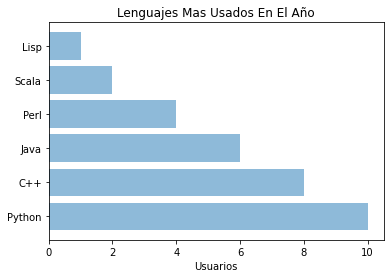

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

lenguajes = ['Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp']
#Obtenemos una lista con las posiciones de cada lenguaje, ejemplo 0, 1, 2, 3.....
y_pos = np.arange(len(lenguajes))

#Ahora obtenemos la cantidad de usos de cada lenguaje
cantidad_usos = [10,8,6,4,2,1]

#Creamos la grafica pasando los valores en el eje X, Y, donde X = cantidad_usos y Y = lenguajes
plt.barh(y_pos, cantidad_usos, align='center', alpha=0.5)
#Añadimos la etiqueta de nombre de cada lenguaje en su posicion correcta
plt.yticks(y_pos, lenguajes)
#añadimos una etiqueta en el eje X
plt.xlabel('Usuarios')
#Y una etiqueta superior
plt.title('Lenguajes Mas Usados En El Año')
plt.savefig('barras_horizontal.png')
plt.show()

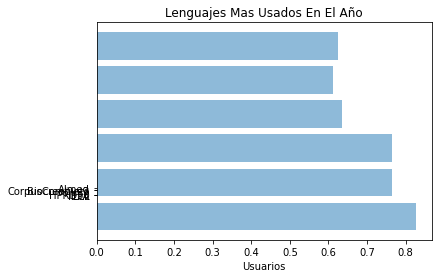

In [47]:
lenguajes = ['Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp']
#Obtenemos una lista con las posiciones de cada lenguaje, ejemplo 0, 1, 2, 3.....
y_pos = np.arange(len(df_KNN_NB_RF["Accuracy"]))

#Ahora obtenemos la cantidad de usos de cada lenguaje
cantidad_usos = [10,8,6,4,2,1]

#Creamos la grafica pasando los valores en el eje X, Y, donde X = cantidad_usos y Y = lenguajes
plt.barh(y_pos, df_KNN_NB_RF["Accuracy"], align='center', alpha=0.5)
#Añadimos la etiqueta de nombre de cada lenguaje en su posicion correcta
plt.yticks(df_KNN_NB_RF["Accuracy"], df_KNN_NB_RF["Corpus"])
#añadimos una etiqueta en el eje X
plt.xlabel('Usuarios')
#Y una etiqueta superior
plt.title('Lenguajes Mas Usados En El Año')
plt.savefig('barras_horizontal.png')
plt.show()

<AxesSubplot:>

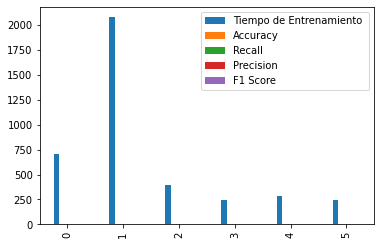

In [48]:
df_KNN_NB_RF.plot(kind = 'bar')


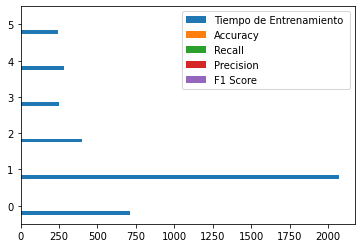

In [49]:
df_KNN_NB_RF.plot(kind = 'barh');


# Mejores resultados TFIDF - Cls

In [50]:
rutas_cls_NB = MejoresResultadosClasificadorV1("NB")
MejoresResultadosRepresentacionCorpus(cls = "NB", representacion = rutas_cls_NB[0] )

###################################
AImed
0.672
AImed_NB_TFIDF_Filtrado_spacy.txt
10.0
###################################
###################################
LLL
0.739
LLL_NB_TFIDF_InfoExtra_patrones.txt
85.0
###################################
###################################
Biocreative3
0.992
Biocreative3_NB_TFIDF_InfoExtra_spacy.txt
297.0
###################################
###################################
IEPA
0.864
IEPA_NB_TFIDF_InfoExtra_patrones.txt
12.0
###################################
###################################
CorpusCompleto
0.986
CorpusCompleto_NB_TFIDF_InfoExtra_spacy.txt
33.0
###################################
###################################
HPRD50
0.732
HPRD50_NB_TFIDF_InfoExtra_patrones.txt
9.0
###################################
###################################
Biocreative3NB
0.938
Biocreative3NB_TFIDFInfoExtra.txt
218.0
###################################
Nombre documento:  Biocreative3_NB_TFIDF_InfoExtra_spacy.txt
Mejor Accuracy:  0.9921343

('Biocreative3_NB_TFIDF_InfoExtra_spacy.txt', 0.9921343950281608)

In [51]:
rutas_cls_NB = MejoresResultadosClasificadorV1("SVM")
MejoresResultadosRepresentacionCorpus(cls = "SVM", representacion = rutas_cls_NB[0] )

###################################
CorpusCompleto
0.999
CorpusCompleto_SVM_TFIDF_InfoExtra_patrones.txt
490.0
###################################
###################################
IEPA
0.906
IEPA_SVM_TFIDF_InfoExtra_patrones.txt
195.0
###################################
###################################
LLL
0.85
LLL_SVM_TFIDF_InfoExtra_patrones.txt
5.0
###################################
###################################
AImed
0.909
AImed_SVM_TFIDF_InfoExtra_patrones.txt
59.0
###################################
###################################
Biocreative3SVM
0.955
Biocreative3SVM_TFIDFInfoExtra.txt
153.0
###################################
###################################
Biocreative3
0.996
Biocreative3_SVM_TFIDF_InfoExtra_spacy.txt
329.0
###################################
###################################
HPRD50
0.802
HPRD50_SVM_TFIDF_InfoExtra_patrones.txt
75.0
###################################
Nombre documento:  CorpusCompleto_SVM_TFIDF_InfoExtra_patrones.txt
Mejo

('CorpusCompleto_SVM_TFIDF_InfoExtra_patrones.txt', 0.9991007194244604)

In [52]:
rutas_cls_NB = MejoresResultadosClasificadorV1("KNN")
MejoresResultadosRepresentacionCorpus(cls = "KNN", representacion = rutas_cls_NB[0] )

###################################
HPRD50
0.812
HPRD50_KNN_TFIDF_InfoExtra_patrones.txt
73.0
###################################
###################################
LLL
0.809
LLL_KNN_TFIDF_InfoExtra_patrones.txt
12.0
###################################
###################################
CorpusCompleto
0.997
CorpusCompleto_KNN_TFIDF_InfoExtra_patrones.txt
489.0
###################################
###################################
IEPA
0.899
IEPA_KNN_TFIDF_InfoExtra_patrones.txt
13.0
###################################
###################################
Biocreative3
1.0
Biocreative3_KNN_TFIDF_InfoExtra_patrones.txt
199.0
###################################
###################################
AImed
0.91
AImed_KNN_TFIDF_InfoExtra_patrones.txt
448.0
###################################
Nombre documento:  Biocreative3_KNN_TFIDF_InfoExtra_patrones.txt
Mejor Accuracy:  0.9997757324842644


('Biocreative3_KNN_TFIDF_InfoExtra_patrones.txt', 0.9997757324842644)

In [53]:
rutas_cls_NB = MejoresResultadosClasificadorV1("RF")
MejoresResultadosRepresentacionCorpus(cls = "RF", representacion = rutas_cls_NB[0] )

###################################
IEPA
0.915
IEPA_RF_TFIDF_InfoExtra_patrones.txt
13.0
###################################
###################################
LLL
0.852
LLL_RF_TFIDF_InfoExtra_patrones.txt
4.0
###################################
###################################
Biocreative3
1.0
Biocreative3_RF_TFIDF_InfoExtra_patrones.txt
201.0
###################################
###################################
CorpusCompleto
0.999
CorpusCompleto_RF_TFIDF_InfoExtra_patrones.txt
492.0
###################################
###################################
HPRD50
0.84
HPRD50_RF_TFIDF_InfoExtra_patrones.txt
73.0
###################################
###################################
AImed
0.925
AImed_RF_TFIDF_InfoExtra_patrones.txt
452.0
###################################
Nombre documento:  Biocreative3_RF_TFIDF_InfoExtra_patrones.txt
Mejor Accuracy:  0.9999055715723218


('Biocreative3_RF_TFIDF_InfoExtra_patrones.txt', 0.9999055715723218)

# Mejores resultados TFIDF LEXICON - Cls

In [54]:
rutas_cls_NB = MejoresResultadosClasificadorV1("NB")
MejoresResultadosRepresentacionCorpus(cls = "NB", representacion = rutas_cls_NB[1] )

###################################
LLL
0.852
LLL_NB_TFIDF_LEXICON_InfoExtra_patrones.txt
82.0
###################################
###################################
CorpusCompleto
0.848
CorpusCompleto_NB_TFIDF_LEXICON_InfoExtra_patrones.txt
7251.0
###################################
###################################
HPRD50
0.804
HPRD50_NB_TFIDF_LEXICON_InfoExtra_patrones.txt
5.0
###################################
###################################
Biocreative3
0.665
Biocreative3_NB_TFIDF_LEXICON_Filtrado_spacy.txt
851.0
###################################
###################################
IEPA
0.894
IEPA_NB_TFIDF_LEXICON_InfoExtra_patrones.txt
12.0
###################################
###################################
AImed
0.787
AImed_NB_TFIDF_LEXICON_InfoExtra_patrones.txt
110.0
###################################
Nombre documento:  IEPA_NB_TFIDF_LEXICON_InfoExtra_patrones.txt
Mejor Accuracy:  0.8937685459940653


('IEPA_NB_TFIDF_LEXICON_InfoExtra_patrones.txt', 0.8937685459940653)

In [55]:
rutas_cls_NB = MejoresResultadosClasificadorV1("SVM")
MejoresResultadosRepresentacionCorpus(cls = "SVM", representacion = rutas_cls_NB[1] )

###################################
AImed
0.935
AImed_SVM_TFIDF_LEXICON_InfoExtra_patrones.txt
1542.0
###################################
###################################
Biocreative3
0.753
Biocreative3_SVM_TFIDF_LEXICON_NoFiltrado.txt
6297.0
###################################
###################################
IEPA
0.907
IEPA_SVM_TFIDF_LEXICON_InfoExtra_patrones.txt
8.0
###################################
###################################
CorpusCompleto
0.854
CorpusCompleto_SVM_TFIDF_LEXICON_Filtrado_spacy.txt
485.0
###################################
###################################
HPRD50
0.83
HPRD50_SVM_TFIDF_LEXICON_InfoExtra_patrones.txt
11.0
###################################
###################################
LLL
0.85
LLL_SVM_TFIDF_LEXICON_InfoExtra_patrones.txt
14.0
###################################
Nombre documento:  AImed_SVM_TFIDF_LEXICON_InfoExtra_patrones.txt
Mejor Accuracy:  0.9345252476443585


('AImed_SVM_TFIDF_LEXICON_InfoExtra_patrones.txt', 0.9345252476443585)

In [56]:
rutas_cls_NB = MejoresResultadosClasificadorV1("KNN")
MejoresResultadosRepresentacionCorpus(cls = "KNN", representacion = rutas_cls_NB[1] )

###################################
IEPA
0.888
IEPA_KNN_TFIDF_LEXICON_InfoExtra_patrones.txt
16.0
###################################
###################################
CorpusCompleto
0.995
CorpusCompleto_KNN_TFIDF_LEXICON_InfoExtra_patrones.txt
51.0
###################################
###################################
HPRD50
0.793
HPRD50_KNN_TFIDF_LEXICON_InfoExtra_patrones.txt
11.0
###################################
###################################
Biocreative3
0.684
Biocreative3_KNN_TFIDF_LEXICON_NoFiltrado.txt
606.0
###################################
###################################
LLL
0.816
LLL_KNN_TFIDF_LEXICON_InfoExtra_patrones.txt
8.0
###################################
###################################
AImed
0.936
AImed_KNN_TFIDF_LEXICON_InfoExtra_patrones.txt
221.0
###################################
Nombre documento:  CorpusCompleto_KNN_TFIDF_LEXICON_InfoExtra_patrones.txt
Mejor Accuracy:  0.9949468996231586


('CorpusCompleto_KNN_TFIDF_LEXICON_InfoExtra_patrones.txt', 0.9949468996231586)

In [57]:
rutas_cls_NB = MejoresResultadosClasificadorV1("RF")
MejoresResultadosRepresentacionCorpus(cls = "RF", representacion = rutas_cls_NB[1] )

###################################
CorpusCompleto
0.999
CorpusCompleto_RF_TFIDF_LEXICON_InfoExtra_patrones.txt
79.0
###################################
###################################
AImed
0.973
AImed_RF_TFIDF_LEXICON_InfoExtra_patrones.txt
18.0
###################################
###################################
LLL
0.847
LLL_RF_TFIDF_LEXICON_InfoExtra_patrones.txt
22.0
###################################
###################################
HPRD50
0.84
HPRD50_RF_TFIDF_LEXICON_InfoExtra_patrones.txt
13.0
###################################
###################################
IEPA
0.916
IEPA_RF_TFIDF_LEXICON_InfoExtra_patrones.txt
23.0
###################################
###################################
Biocreative3
0.815
Biocreative3_RF_TFIDF_LEXICON_NoFiltrado.txt
758.0
###################################
Nombre documento:  CorpusCompleto_RF_TFIDF_LEXICON_InfoExtra_patrones.txt
Mejor Accuracy:  0.9994861253854059


('CorpusCompleto_RF_TFIDF_LEXICON_InfoExtra_patrones.txt', 0.9994861253854059)

# Mejores resultados WEMB - Cls

In [58]:
rutas_cls_NB = MejoresResultadosClasificadorV1("NB")
MejoresResultadosRepresentacionCorpus(cls = "NB", representacion = rutas_cls_NB[2] )

###################################
Biocreative3
0.8
Biocreative3_NB_WEMB_Filtrado_patrones.txt
6362.0
###################################
###################################
LLL
0.724
LLL_NB_WEMB_InfoExtra_patrones.txt
97.0
###################################
###################################
HPRD50
0.718
HPRD50_NB_WEMB_InfoExtra_patrones.txt
7.0
###################################
###################################
CorpusCompleto
0.834
CorpusCompleto_NB_WEMB_InfoExtra_spacy.txt
3709.0
###################################
###################################
IEPA
0.777
IEPA_NB_WEMB_InfoExtra_patrones.txt
12.0
###################################
###################################
AImed
0.851
AImed_NB_WEMB_InfoExtra_spacy.txt
8.0
###################################
Nombre documento:  AImed_NB_WEMB_InfoExtra_spacy.txt
Mejor Accuracy:  0.850632911392405


('AImed_NB_WEMB_InfoExtra_spacy.txt', 0.850632911392405)

In [59]:
rutas_cls_NB = MejoresResultadosClasificadorV1("SVM")
MejoresResultadosRepresentacionCorpus(cls = "SVM", representacion = rutas_cls_NB[2] )

###################################
LLL
0.837
LLL_SVM_WEMB_InfoExtra_patrones.txt
22.0
###################################
###################################
HPRD50
0.796
HPRD50_SVM_WEMB_InfoExtra_patrones.txt
12.0
###################################
###################################
AImed
0.891
AImed_SVM_WEMB_Filtrado_spacy.txt
104.0
###################################
###################################
Biocreative3
0.859
Biocreative3_SVM_WEMB_InfoExtra_spacy.txt
6724.0
###################################
###################################
IEPA
0.853
IEPA_SVM_WEMB_InfoExtra_patrones.txt
4.0
###################################
###################################
CorpusCompleto
0.964
CorpusCompleto_SVM_WEMB_InfoExtra_patrones.txt
41.0
###################################
Nombre documento:  CorpusCompleto_SVM_WEMB_InfoExtra_patrones.txt
Mejor Accuracy:  0.9636433710174718


('CorpusCompleto_SVM_WEMB_InfoExtra_patrones.txt', 0.9636433710174718)

In [60]:
rutas_cls_NB = MejoresResultadosClasificadorV1("KNN")
MejoresResultadosRepresentacionCorpus(cls = "KNN", representacion = rutas_cls_NB[2] )

###################################
AImed
0.865
AImed_KNN_WEMB_InfoExtra_patrones.txt
53.0
###################################
###################################
LLL
0.705
LLL_KNN_WEMB_InfoExtra_spacy.txt
102.0
###################################
###################################
CorpusCompleto
0.819
CorpusCompleto_KNN_WEMB_InfoExtra_spacy.txt
3842.0
###################################
###################################
HPRD50
0.657
HPRD50_KNN_WEMB_Filtrado_patrones.txt
9.0
###################################
###################################
Biocreative3
0.699
Biocreative3_KNN_WEMB_NoFiltrado.txt
188.0
###################################
###################################
IEPA
0.793
IEPA_KNN_WEMB_InfoExtra_spacy.txt
9.0
###################################
Nombre documento:  AImed_KNN_WEMB_InfoExtra_patrones.txt
Mejor Accuracy:  0.8649432230007248


('AImed_KNN_WEMB_InfoExtra_patrones.txt', 0.8649432230007248)

In [61]:
rutas_cls_NB = MejoresResultadosClasificadorV1("RF")
MejoresResultadosRepresentacionCorpus(cls = "RF", representacion = rutas_cls_NB[2] )

###################################
HPRD50
0.84
HPRD50_RF_WEMB_InfoExtra_patrones.txt
3.0
###################################
###################################
CorpusCompleto
0.999
CorpusCompleto_RF_WEMB_InfoExtra_patrones.txt
26.0
###################################
###################################
Biocreative3
0.996
Biocreative3_RF_WEMB_InfoExtra_spacy.txt
189.0
###################################
###################################
IEPA
0.915
IEPA_RF_WEMB_InfoExtra_patrones.txt
11.0
###################################
###################################
AImed
0.919
AImed_RF_WEMB_InfoExtra_patrones.txt
8.0
###################################
###################################
LLL
0.852
LLL_RF_WEMB_InfoExtra_patrones.txt
95.0
###################################
Nombre documento:  CorpusCompleto_RF_WEMB_InfoExtra_patrones.txt
Mejor Accuracy:  0.9992291880781089


('CorpusCompleto_RF_WEMB_InfoExtra_patrones.txt', 0.9992291880781089)

# Mejores resultados WEMB LEXICON - Cls

In [62]:
rutas_cls_NB = MejoresResultadosClasificadorV1("NB")
MejoresResultadosRepresentacionCorpus(cls = "NB", representacion = rutas_cls_NB[3] )

###################################
HPRD50
0.73
HPRD50_NB_WEMB_LEXICON_InfoExtra_patrones.txt
12.0
###################################
###################################
Biocreative3
0.792
Biocreative3_NB_WEMB_LEXICON_Filtrado_patrones.txt
596.0
###################################
###################################
AImed
0.853
AImed_NB_WEMB_LEXICON_InfoExtra_spacy.txt
18.0
###################################
###################################
CorpusCompleto
0.832
CorpusCompleto_NB_WEMB_LEXICON_InfoExtra_spacy.txt
52.0
###################################
###################################
IEPA
0.779
IEPA_NB_WEMB_LEXICON_InfoExtra_patrones.txt
32.0
###################################
###################################
LLL
0.724
LLL_NB_WEMB_LEXICON_InfoExtra_patrones.txt
175.0
###################################
Nombre documento:  AImed_NB_WEMB_LEXICON_InfoExtra_spacy.txt
Mejor Accuracy:  0.8531645569620253


('AImed_NB_WEMB_LEXICON_InfoExtra_spacy.txt', 0.8531645569620253)

In [63]:
rutas_cls_NB = MejoresResultadosClasificadorV1("SVM")
MejoresResultadosRepresentacionCorpus(cls = "SVM", representacion = rutas_cls_NB[3] )

###################################
CorpusCompleto
0.842
CorpusCompleto_SVM_WEMB_LEXICON_Filtrado_patrones.txt
105.0
###################################
###################################
HPRD50
0.799
HPRD50_SVM_WEMB_LEXICON_InfoExtra_patrones.txt
18.0
###################################
###################################
AImed
0.891
AImed_SVM_WEMB_LEXICON_Filtrado_spacy.txt
351.0
###################################
###################################
LLL
0.838
LLL_SVM_WEMB_LEXICON_InfoExtra_patrones.txt
15.0
###################################
###################################
IEPA
0.83
IEPA_SVM_WEMB_LEXICON_Filtrado_spacy.txt
7.0
###################################
###################################
Biocreative3
0.861
Biocreative3_SVM_WEMB_LEXICON_NoFiltrado.txt
2359.0
###################################
Nombre documento:  AImed_SVM_WEMB_LEXICON_Filtrado_spacy.txt
Mejor Accuracy:  0.8905109489051095


('AImed_SVM_WEMB_LEXICON_Filtrado_spacy.txt', 0.8905109489051095)

In [64]:
rutas_cls_NB = MejoresResultadosClasificadorV1("KNN")
MejoresResultadosRepresentacionCorpus(cls = "KNN", representacion = rutas_cls_NB[3] )

###################################
HPRD50
0.717
HPRD50_KNN_WEMB_LEXICON_InfoExtra_spacy.txt
39.0
###################################
###################################
LLL
0.704
LLL_KNN_WEMB_LEXICON_Filtrado_spacy.txt
5.0
###################################
###################################
CorpusCompleto
0.787
CorpusCompleto_KNN_WEMB_LEXICON_InfoExtra_spacy.txt
1875.0
###################################
###################################
IEPA
0.792
IEPA_KNN_WEMB_LEXICON_Filtrado_spacy.txt
32.0
###################################
###################################
AImed
0.876
AImed_KNN_WEMB_LEXICON_Filtrado_spacy.txt
252.0
###################################
###################################
Biocreative3
0.672
Biocreative3_KNN_WEMB_LEXICON_Filtrado_patrones.txt
845.0
###################################
Nombre documento:  AImed_KNN_WEMB_LEXICON_Filtrado_spacy.txt
Mejor Accuracy:  0.8759124087591241


('AImed_KNN_WEMB_LEXICON_Filtrado_spacy.txt', 0.8759124087591241)

In [65]:
rutas_cls_NB = MejoresResultadosClasificadorV1("RF")
MejoresResultadosRepresentacionCorpus(cls = "RF", representacion = rutas_cls_NB[3] )

###################################
HPRD50
0.84
HPRD50_RF_WEMB_LEXICON_InfoExtra_patrones.txt
150.0
###################################
###################################
AImed
0.869
AImed_RF_WEMB_LEXICON_Filtrado_spacy.txt
18.0
###################################
###################################
LLL
0.852
LLL_RF_WEMB_LEXICON_InfoExtra_patrones.txt
169.0
###################################
###################################
CorpusCompleto
0.995
CorpusCompleto_RF_WEMB_LEXICON_InfoExtra_spacy.txt
65.0
###################################
###################################
IEPA
0.917
IEPA_RF_WEMB_LEXICON_InfoExtra_patrones.txt
32.0
###################################
###################################
Biocreative3
0.834
Biocreative3_RF_WEMB_LEXICON_NoFiltrado.txt
343.0
###################################
Nombre documento:  CorpusCompleto_RF_WEMB_LEXICON_InfoExtra_spacy.txt
Mejor Accuracy:  0.9950980392156863


('CorpusCompleto_RF_WEMB_LEXICON_InfoExtra_spacy.txt', 0.9950980392156863)

# Mejores resultados WEMB LEXICON TFIDF - Cls

In [66]:
print("NB")
rutas_cls_NB = MejoresResultadosClasificadorV1("NB")
MejoresResultadosRepresentacionCorpus(cls = "NB", representacion = rutas_cls_NB[4] )
print("#############################################################")
print("SVM")
rutas_cls_NB = MejoresResultadosClasificadorV1("SVM")
MejoresResultadosRepresentacionCorpus(cls = "SVM", representacion = rutas_cls_NB[4] )
print("#############################################################")
print("KNN")
rutas_cls_NB = MejoresResultadosClasificadorV1("KNN")
MejoresResultadosRepresentacionCorpus(cls = "KNN", representacion = rutas_cls_NB[4] )
print("#############################################################")
print("RF")
rutas_cls_NB = MejoresResultadosClasificadorV1("RF")
MejoresResultadosRepresentacionCorpus(cls = "RF", representacion = rutas_cls_NB[4] )
print("#############################################################")


NB
###################################
CorpusCompleto
0.599
CorpusCompleto_NB_WEMB_LEXICON_TFIDF_NoFiltrado.txt
146.0
###################################
###################################
Biocreative3
0.676
Biocreative3_NB_WEMB_LEXICON_TFIDF_Filtrado_spacy.txt
518.0
###################################
###################################
LLL
0.645
LLL_NB_WEMB_LEXICON_TFIDF_Filtrado_patrones.txt
7.0
###################################
###################################
IEPA
0.755
IEPA_NB_WEMB_LEXICON_TFIDF_Filtrado_spacy.txt
10.0
###################################
###################################
AImed
0.787
AImed_NB_WEMB_LEXICON_TFIDF_InfoExtra_patrones.txt
553.0
###################################
###################################
HPRD50
0.735
HPRD50_NB_WEMB_LEXICON_TFIDF_Filtrado_patrones.txt
24.0
###################################
Nombre documento:  AImed_NB_WEMB_LEXICON_TFIDF_InfoExtra_patrones.txt
Mejor Accuracy:  0.7871466537811066
#######################################

# Mejores resultados MULTIPLE TFIDF - Cls

In [67]:
#print("NB")
#rutas_cls_NB = MejoresResultadosClasificadorV1("NB")
#MejoresResultadosRepresentacionCorpus(cls = "NB", representacion = rutas_cls_NB[5] )
print("#############################################################")
print("SVM")
rutas_cls_NB = MejoresResultadosClasificadorV1("SVM")
MejoresResultadosRepresentacionCorpus(cls = "SVM", representacion = rutas_cls_NB[5] )
#print("#############################################################")
#print("KNN")
#rutas_cls_NB = MejoresResultadosClasificadorV1("KNN")
#MejoresResultadosRepresentacionCorpus(cls = "KNN", representacion = rutas_cls_NB[5] )
#print("#############################################################")
#print("RF")
#rutas_cls_NB = MejoresResultadosClasificadorV1("RF")
#MejoresResultadosRepresentacionCorpus(cls = "RF", representacion = rutas_cls_NB[5] )
#print("#############################################################")


#############################################################
SVM
###################################
Biocreative3
0.851
Biocreative3_SVM_MULTIPLE_TFIDF_NoFiltrado.txt
6169.0
###################################
###################################
AImed
0.876
AImed_SVM_MULTIPLE_TFIDF_Filtrado_spacy.txt
203.0
###################################
###################################
LLL
0.71
LLL_SVM_MULTIPLE_TFIDF_Filtrado_patrones.txt
440.0
###################################
###################################
CorpusCompleto
0.837
CorpusCompleto_SVM_MULTIPLE_TFIDF_Filtrado_spacy.txt
432.0
###################################
###################################
IEPA
0.755
IEPA_SVM_MULTIPLE_TFIDF_Filtrado_spacy.txt
499.0
###################################
###################################
HPRD50
0.765
HPRD50_SVM_MULTIPLE_TFIDF_Filtrado_patrones.txt
1869.0
###################################
Nombre documento:  AImed_SVM_MULTIPLE_TFIDF_Filtrado_spacy.txt
Mejor Accuracy:  0.8759124087591241


('AImed_SVM_MULTIPLE_TFIDF_Filtrado_spacy.txt', 0.8759124087591241)

# Mejores resultados MULTIPLE WEMB - Cls

In [68]:
#print("NB")
#rutas_cls_NB = MejoresResultadosClasificadorV1("NB")
#MejoresResultadosRepresentacionCorpus(cls = "NB", representacion = rutas_cls_NB[6] )
print("#############################################################")
print("SVM")
rutas_cls_NB = MejoresResultadosClasificadorV1("SVM")
MejoresResultadosRepresentacionCorpus(cls = "SVM", representacion = rutas_cls_NB[6] )
#print("#############################################################")
#print("KNN")
#rutas_cls_NB = MejoresResultadosClasificadorV1("KNN")
#MejoresResultadosRepresentacionCorpus(cls = "KNN", representacion = rutas_cls_NB[6] )
#print("#############################################################")
#print("RF")
#rutas_cls_NB = MejoresResultadosClasificadorV1("RF")
#MejoresResultadosRepresentacionCorpus(cls = "RF", representacion = rutas_cls_NB[6] )
#print("#############################################################")


#############################################################
SVM
###################################
Biocreative3
0.858
Biocreative3_SVM_MULTIPLE_WEMB_NoFiltrado.txt
2585.0
###################################
###################################
LLL
0.704
LLL_SVM_MULTIPLE_WEMB_Filtrado_spacy.txt
208.0
###################################
###################################
CorpusCompleto
0.842
CorpusCompleto_SVM_MULTIPLE_WEMB_Filtrado_patrones.txt
271.0
###################################
###################################
AImed
0.891
AImed_SVM_MULTIPLE_WEMB_Filtrado_spacy.txt
245.0
###################################
###################################
IEPA
0.83
IEPA_SVM_MULTIPLE_WEMB_Filtrado_spacy.txt
1643.0
###################################
###################################
HPRD50
0.676
HPRD50_SVM_MULTIPLE_WEMB_Filtrado_patrones.txt
511.0
###################################
Nombre documento:  AImed_SVM_MULTIPLE_WEMB_Filtrado_spacy.txt
Mejor Accuracy:  0.8905109489051095


('AImed_SVM_MULTIPLE_WEMB_Filtrado_spacy.txt', 0.8905109489051095)

# Mejores resultados LEXICON - Cls

In [69]:
print("NB")
rutas_cls_NB = MejoresResultadosClasificadorV1("NB")
MejoresResultadosRepresentacionCorpus(cls = "NB", representacion = rutas_cls_NB[7] )
print("#############################################################")
print("SVM")
rutas_cls_NB = MejoresResultadosClasificadorV1("SVM")
MejoresResultadosRepresentacionCorpus(cls = "SVM", representacion = rutas_cls_NB[7] )
print("#############################################################")
print("KNN")
rutas_cls_NB = MejoresResultadosClasificadorV1("KNN")
MejoresResultadosRepresentacionCorpus(cls = "KNN", representacion = rutas_cls_NB[7] )
print("#############################################################")
print("RF")
rutas_cls_NB = MejoresResultadosClasificadorV1("RF")
MejoresResultadosRepresentacionCorpus(cls = "RF", representacion = rutas_cls_NB[7] )
print("#############################################################")


NB
###################################
HPRD50
0.63
HPRD50_NB_LEXICON_Filtrado_spacy.txt
6.0
###################################
###################################
AImed
0.898
AImed_NB_LEXICON_Filtrado_spacy.txt
103.0
###################################
###################################
IEPA
0.736
IEPA_NB_LEXICON_Filtrado_spacy.txt
3.0
###################################
###################################
CorpusCompleto
0.779
CorpusCompleto_NB_LEXICON_Filtrado_spacy.txt
35.0
###################################
###################################
LLL
0.704
LLL_NB_LEXICON_Filtrado_spacy.txt
4.0
###################################
###################################
Biocreative3
0.719
Biocreative3_NB_LEXICON_NoFiltrado.txt
312.0
###################################
Nombre documento:  AImed_NB_LEXICON_Filtrado_spacy.txt
Mejor Accuracy:  0.8978102189781022
#############################################################
SVM
###################################
AImed
0.891
AImed_SVM_LEXICON_Fi

In [70]:
def MejoresResultadosRepresentacion(cls, representacion):
    max_acc = 0 
    doc = ""
    for i in representacion:
        f = open(f'{cls}/{i}','r')
        acc = list(f)[0].split(" ")
        acc = float(acc[2]) 
        if acc > max_acc:
            max_acc = acc
        doc = i
    print("Nombre documento: ", doc) 
    print("Mejor Accuracy: ", max_acc) 
    return doc, max_acc
    

In [71]:
def MejoresResultadosClasificador(cls):
    TFIDF_LEXICON = []
    TFIDF = []
    WEMB_LEXICON_TFIDF = []
    WEMB_LEXICON = []
    WEMB = []
    
    resultados = os.listdir(f"{cls}/")

    for i in resultados:
        if "TFIDF_LEXICON" in i:
            TFIDF_LEXICON.append(i)
        elif "WEMB_LEXICON_TFIDF" in i:
            WEMB_LEXICON_TFIDF.append(i)
        elif "WEMB_LEXICON" in i:
            WEMB_LEXICON.append(i)
        elif "WEMB" in i:
            WEMB.append(i)
        elif "TFIDF" in i:
            TFIDF.append(i)
    print("#############################################")
    print("Mejores resultados TFIDF")
    MejoresResultadosRepresentacion(cls = cls, representacion = TFIDF )
    print("#############################################")
    
    print("#############################################")
    print("Mejores resultados TFIDF_LEXICON")
    MejoresResultadosRepresentacion(cls = cls, representacion = TFIDF_LEXICON )
    print("#############################################")
    
    print("#############################################")
    print("Mejores resultados WEMB")
    MejoresResultadosRepresentacion(cls = cls, representacion = WEMB )
    print("#############################################")
    
    print("#############################################")
    print("Mejores resultados WEMB_LEXICON")
    MejoresResultadosRepresentacion(cls = cls, representacion = WEMB_LEXICON )
    print("#############################################")
    
    print("#############################################")
    print("Mejores resultados WEMB_LEXICON_TFIDF")
    MejoresResultadosRepresentacion(cls = cls, representacion = WEMB_LEXICON_TFIDF )
    print("#############################################")

In [72]:
MejoresResultadosClasificador("KNN")

#############################################
Mejores resultados TFIDF
Nombre documento:  AImed_KNN_TFIDF_Filtrado_patrones.txt
Mejor Accuracy:  0.9997757324842644
#############################################
#############################################
Mejores resultados TFIDF_LEXICON
Nombre documento:  Biocreative3_KNN_TFIDF_LEXICON_NoFiltrado.txt
Mejor Accuracy:  0.9949468996231586
#############################################
#############################################
Mejores resultados WEMB
Nombre documento:  HPRD50_KNN_MULTIPLE_WEMB_Filtrado_spacy.txt
Mejor Accuracy:  0.8649432230007248
#############################################
#############################################
Mejores resultados WEMB_LEXICON
Nombre documento:  LLL_KNN_WEMB_LEXICON_NoFiltrado.txt
Mejor Accuracy:  0.8759124087591241
#############################################
#############################################
Mejores resultados WEMB_LEXICON_TFIDF
Nombre documento:  CorpusCompleto_KNN_WEMB_LEXICON

In [73]:
MejoresResultadosClasificador("SVM")

#############################################
Mejores resultados TFIDF
Nombre documento:  IEPA_SVM_TFIDF_Filtrado_patrones.txt
Mejor Accuracy:  0.9991007194244604
#############################################
#############################################
Mejores resultados TFIDF_LEXICON
Nombre documento:  HPRD50_SVM_TFIDF_LEXICON_InfoExtra_spacy.txt
Mejor Accuracy:  0.9345252476443585
#############################################
#############################################
Mejores resultados WEMB
Nombre documento:  LLL_SVM_WEMB_InfoExtra_patrones.txt
Mejor Accuracy:  0.9636433710174718
#############################################
#############################################
Mejores resultados WEMB_LEXICON
Nombre documento:  Biocreative3_SVM_WEMB_LEXICON_Filtrado_patrones.txt
Mejor Accuracy:  0.8905109489051095
#############################################
#############################################
Mejores resultados WEMB_LEXICON_TFIDF
Nombre documento:  HPRD50_SVM_WEMB_LEXICON_T

In [74]:
MejoresResultadosClasificador("NB")

#############################################
Mejores resultados TFIDF
Nombre documento:  Biocreative3_NB_TFIDF_Filtrado_spacy.txt
Mejor Accuracy:  0.9921343950281608
#############################################
#############################################
Mejores resultados TFIDF_LEXICON
Nombre documento:  LLL_NB_TFIDF_LEXICON_InfoExtra_spacy.txt
Mejor Accuracy:  0.8937685459940653
#############################################
#############################################
Mejores resultados WEMB
Nombre documento:  HPRD50_NB_MULTIPLE_WEMB_NoFiltrado.txt
Mejor Accuracy:  0.850632911392405
#############################################
#############################################
Mejores resultados WEMB_LEXICON
Nombre documento:  LLL_NB_WEMB_LEXICON_NoFiltrado.txt
Mejor Accuracy:  0.8531645569620253
#############################################
#############################################
Mejores resultados WEMB_LEXICON_TFIDF
Nombre documento:  IEPA_NB_WEMB_LEXICON_TFIDF_Filtrado_patr

In [75]:
MejoresResultadosClasificador("RF")

#############################################
Mejores resultados TFIDF
Nombre documento:  Biocreative3_RF_TFIDF_InfoExtra_patrones.txt
Mejor Accuracy:  0.9999055715723218
#############################################
#############################################
Mejores resultados TFIDF_LEXICON
Nombre documento:  AImed_RF_TFIDF_LEXICON_NoFiltrado.txt
Mejor Accuracy:  0.9994861253854059
#############################################
#############################################
Mejores resultados WEMB
Nombre documento:  Biocreative3_RF_WEMB_NoFiltrado.txt
Mejor Accuracy:  0.9992291880781089
#############################################
#############################################
Mejores resultados WEMB_LEXICON
Nombre documento:  CorpusCompleto_RF_WEMB_LEXICON_InfoExtra_spacy.txt
Mejor Accuracy:  0.9950980392156863
#############################################
#############################################
Mejores resultados WEMB_LEXICON_TFIDF
Nombre documento:  CorpusCompleto_RF_WEMB_LE